<div style='background-color:orange'>
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align:center ; top-padding:5px'>
        Table of Contents
    </h1></i></u></b>
    <li><a href='#imports'>Imports</a>
    <li><a href='#identifycols'>Identify Columns For Exploration</a>
    <li><a href='#questions'>Questions to Answer</a>
    <li><a href='#misc'>Miscellaneous</a>
    </li>
</div>

<div style='background-color:orange'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Imports
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>

In [2]:
# Vectorization & Dataframe
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# stats
from scipy import stats

# .py files
import wrangle as w

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set default matplotlib plot style to 'bmh'
# mpl.style.use('bmh')

<div style='background-color:orange'>
<a id='identifycols'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Identify Columns For Exploration
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>

In [3]:
# Get the master filtered dataset
master = w.wrangle()
master.head(3)

,crash_id,$1000_damage_to_any_one_person's_property,active_school_zone_flag,adjusted_average_daily_traffic_amount,adjusted_percentage_of_average_daily_traffic_for_trucks,adjusted_roadway_part,agency,at_intersection_flag,average_daily_traffic_amount,average_daily_traffic_year,...,charge,citation,person_age,person_ethnicity,person_gender,person_helmet,person_injury_severity,person_type,physical_location_of_an_occupant,crash_datetime
0,16189632,No,NO,no data,no data,1 - MAIN/PROPER LANE,"DEPARTMENT OF PUBLIC SAFETY, STATE OF TEXAS",False,no data,no data,...,OPERATE UNREGISTERED MOTOR VEHICLE,TX52Q80UKZPL,37,W - WHITE,1 - MALE,1 - NOT WORN,A - SUSPECTED SERIOUS INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-01-01 11:23:00
1,16203470,No,NO,no data,no data,1 - MAIN/PROPER LANE,"DEPARTMENT OF PUBLIC SAFETY, STATE OF TEXAS",False,no data,no data,...,"NO CLASS ""M"" LICENSE",TX52QD0NAP34,30,H - HISPANIC,1 - MALE,"3 - WORN, NOT DAMAGED",B - SUSPECTED MINOR INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-01-04 13:16:00
2,16192023,Yes,NO,no data,no data,1 - MAIN/PROPER LANE,HARRIS COUNTY SHERIFF'S OFFICE,False,no data,no data,...,NO CHARGES,no data,21,W - WHITE,1 - MALE,"2 - WORN, DAMAGED",A - SUSPECTED SERIOUS INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-01-05 20:45:00


<div style='background-color:orange'>
<a id='questions'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Questions to Answer
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    <li><a href='#seasonality'>Seasonality</a>
    <li><a href='#question2'>Question 2</a>
    <li><a href='#question3'>Question 3</a>
    <li><a href='#question4'>Question 4</a>
    </li>
</div>

<a id='question1'></a>
<h3><b><i>
    Question 1
</i></b></h3>
<li><a href='#questions'>Questions to Answer Top</a></li>

1. Does time of day matter?

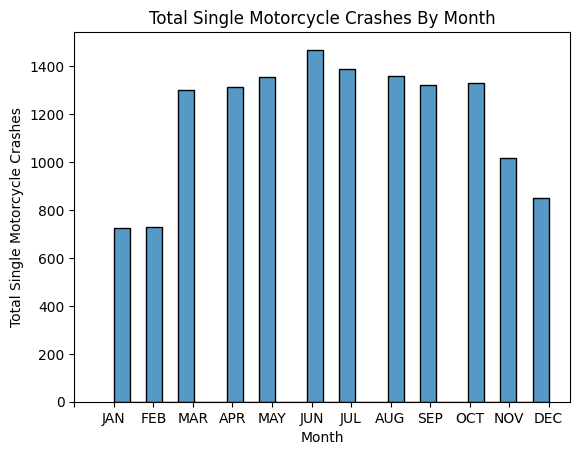

In [15]:
sns.histplot(data=master, x='crash_month')
plt.title('Total Single Motorcycle Crashes By Month')
plt.xlabel('Month')
plt.xticks(ticks=range(13), labels=['', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
plt.ylabel('Total Single Motorcycle Crashes')
plt.show()

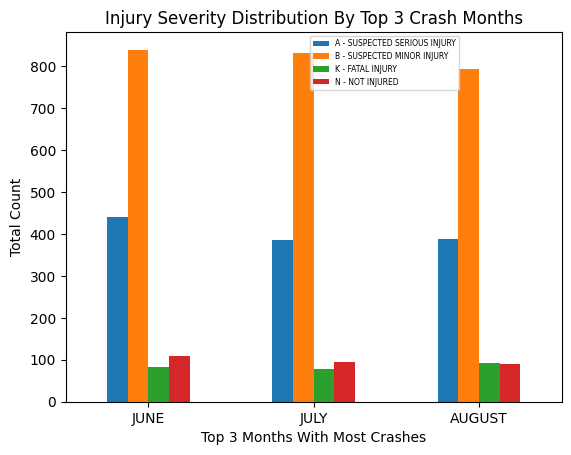

In [45]:
top3months = master[master.crash_datetime.dt.month.isin([6, 7, 8])]
ct = pd.crosstab(top3months.crash_datetime.dt.month, top3months.person_injury_severity)
ax = ct.plot(kind='bar')
plt.title('Injury Severity Distribution By Top 3 Crash Months')
plt.xlabel('Top 3 Months With Most Crashes')
plt.xticks(ticks=range(3), labels=['JUNE', 'JULY', 'AUGUST'], rotation=0)
plt.ylabel('Total Count')
legend = plt.legend(loc='upper right', prop={'size': 5.5})  # Set the size of the legend
legend.set_bbox_to_anchor((0.8, 1))
plt.show()

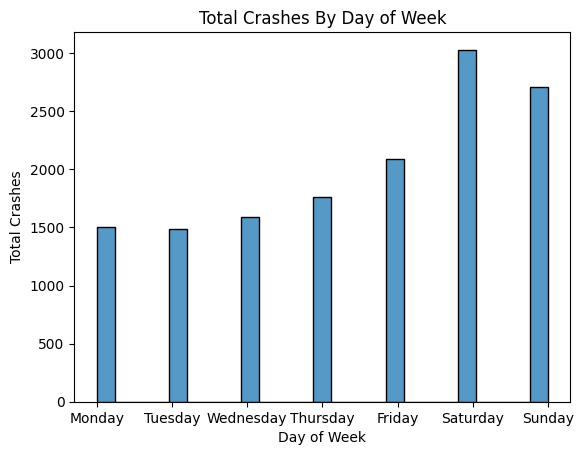

In [51]:
sns.histplot(data=master, x=master.crash_datetime.dt.dayofweek)
plt.title('Total Crashes By Day of Week')
plt.xlabel('Day of Week')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel('Total Crashes')
plt.show()

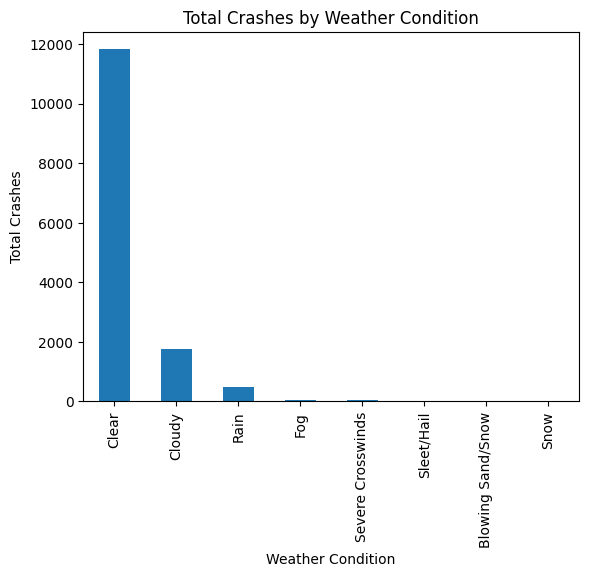

In [109]:
weather_stuff = master[master.weather_condition.str.startswith(('1', '2', '3', '4', '5', '6', '7', '8'))]
weather_stuff.weather_condition.value_counts().plot(kind='bar')
plt.title('Total Crashes by Weather Condition')
plt.xlabel('Weather Condition')
plt.xticks(ticks=range(8), labels=['Clear', 'Cloudy', 'Rain', 'Fog', 'Severe Crosswinds', 'Sleet/Hail', 'Blowing Sand/Snow', 'Snow'], rotation=90)
plt.ylabel('Total Crashes')
plt.show()

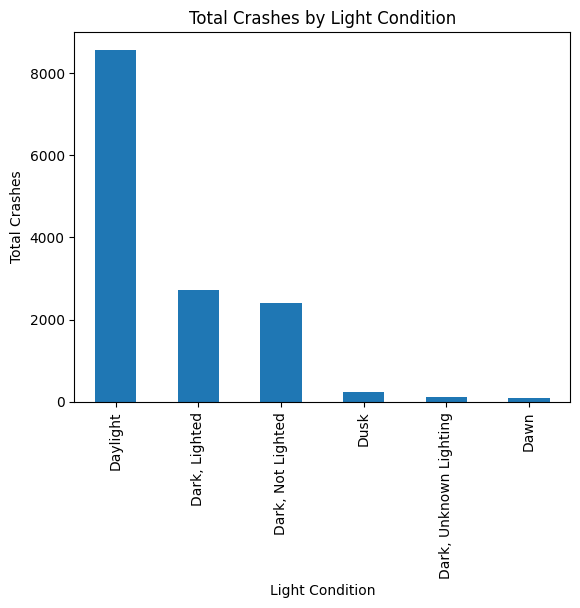

In [111]:
light_stuff = master[master.light_condition.str.startswith(('1', '2', '3', '4', '5', '6'))]
light_stuff.light_condition.value_counts().plot(kind='bar')
plt.title('Total Crashes by Light Condition')
plt.xlabel('Light Condition')
plt.xticks(ticks=range(6), labels=['Daylight', 'Dark, Lighted', 'Dark, Not Lighted', 'Dusk', 'Dark, Unknown Lighting', 'Dawn'], rotation=90)
plt.ylabel('Total Crashes')
plt.show()

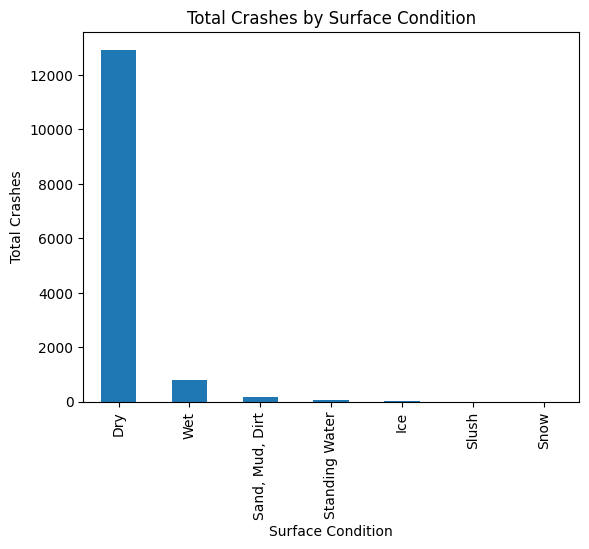

In [113]:
surface_stuff = master[master.surface_condition.str.startswith(('1', '2', '3', '4', '5', '6', '7'))]
surface_stuff.surface_condition.value_counts().plot(kind='bar')
plt.title('Total Crashes by Surface Condition')
plt.xlabel('Surface Condition')
plt.xticks(ticks=range(7), labels=['Dry', 'Wet', 'Sand, Mud, Dirt', 'Standing Water', 'Ice', 'Slush', 'Snow'], rotation=90)
plt.ylabel('Total Crashes')
plt.show()

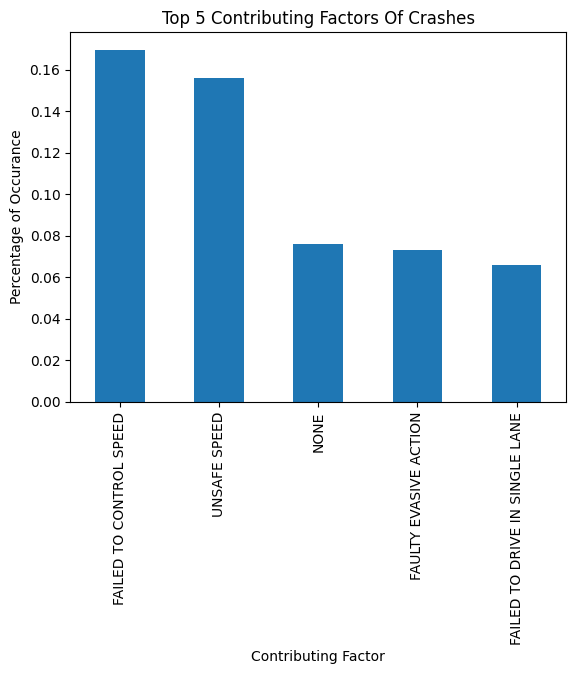

In [86]:
cont_factor = master[~master.contributing_factors.str.startswith('OTHER')]
cont_factor.contributing_factors.value_counts(normalize=True).head().plot(kind='bar')
plt.title('Top 5 Contributing Factors Of Crashes')
plt.xlabel('Contributing Factor')
plt.ylabel('Percentage of Occurance')
plt.show()

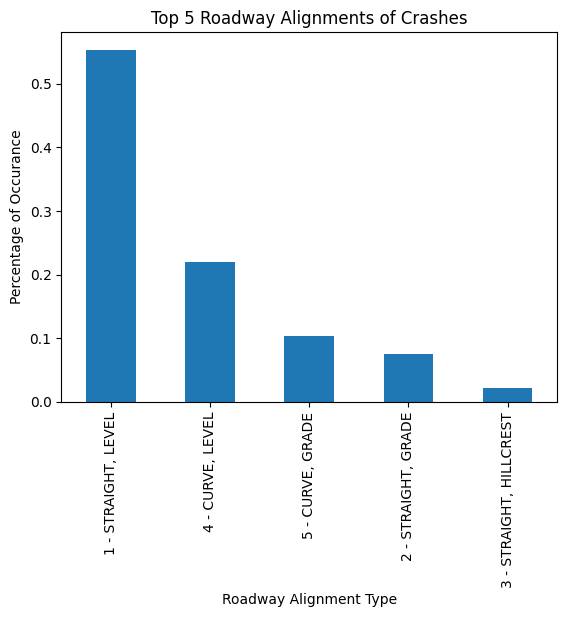

In [90]:
master.roadway_alignment.value_counts(normalize=True).head().plot(kind='bar')
plt.title('Top 5 Roadway Alignments of Crashes')
plt.xlabel('Roadway Alignment Type')
plt.ylabel('Percentage of Occurance')
plt.show()

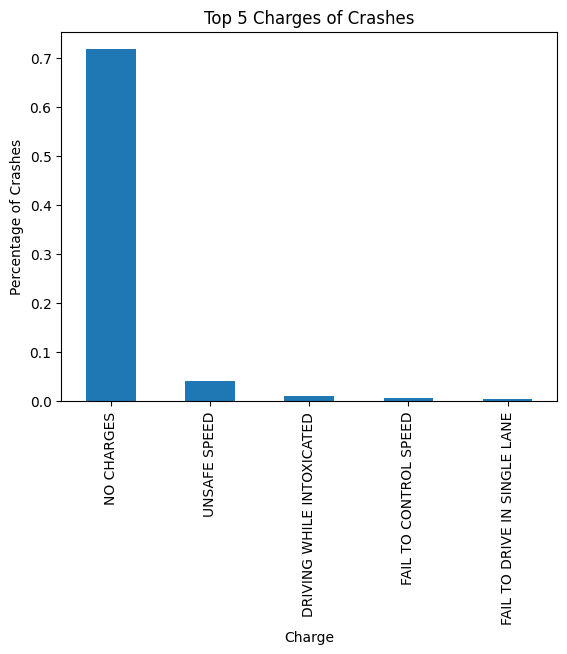

In [116]:
master.charge.value_counts(normalize=True).head().plot(kind='bar')
plt.title('Top 5 Charges of Crashes')
plt.xlabel('Charge')
plt.ylabel('Percentage of Crashes')
plt.show()

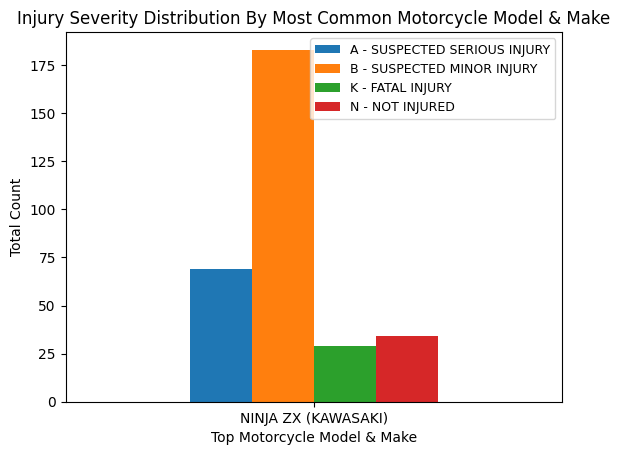

In [139]:
top_makemodel = master[master.vehicle_model_name == 'NINJA ZX (KAWASAKI)']
ct = pd.crosstab(top_makemodel.vehicle_model_name, top_makemodel.person_injury_severity)
ax = ct.plot(kind='bar')
plt.title('Injury Severity Distribution By Most Common Motorcycle Model & Make')
plt.xlabel('Top Motorcycle Model & Make')
plt.xticks(rotation=0)
plt.ylabel('Total Count')
legend = plt.legend(loc='upper right', prop={'size': 9})  # Set the size of the legend
#legend.set_bbox_to_anchor((0.8, 1))
plt.show()

In [141]:
top_makemodel.vehicle_defect_1.value_counts()

vehicle_defect_1
no data                                300
98 - OTHER  (EXPLAIN IN NARRATIVE)       6
12 - DEFECTIVE OR SLICK TIRES            3
10 - DEFECTIVE OR NO VEHICLE BRAKES      3
11 - DEFECTIVE STEERING MECHANISM        3
Name: count, dtype: int64

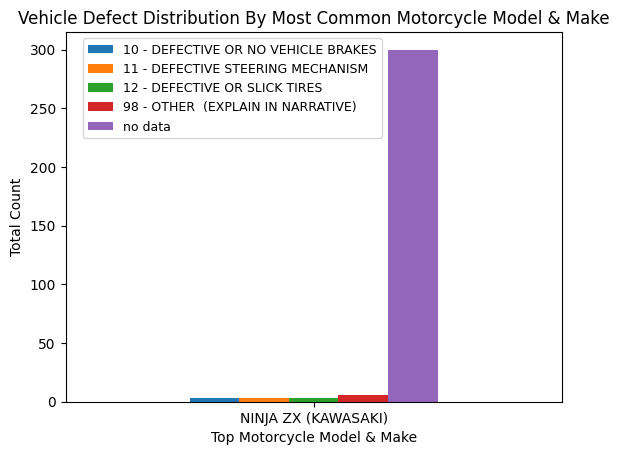

In [157]:
ct = pd.crosstab(top_makemodel.vehicle_model_name, top_makemodel.vehicle_defect_1)
ax = ct.plot(kind='bar')
plt.title('Vehicle Defect Distribution By Most Common Motorcycle Model & Make')
plt.xlabel('Top Motorcycle Model & Make')
plt.xticks(rotation=0)
plt.ylabel('Total Count')
legend = plt.legend(loc='upper right', prop={'size': 9})  # Set the size of the legend
legend.set_bbox_to_anchor((0.65, 1))
plt.show()

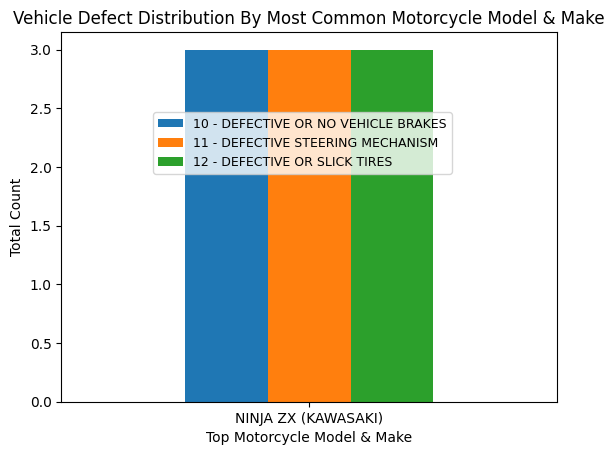

In [150]:
smaller_top_makemodel = top_makemodel[~top_makemodel.vehicle_defect_1.str.startswith(('no data', '98 - OTHER  (EXPLAIN IN NARRATIVE)'))]
ct = pd.crosstab(smaller_top_makemodel.vehicle_model_name, smaller_top_makemodel.vehicle_defect_1)
ax = ct.plot(kind='bar')
plt.title('Vehicle Defect Distribution By Most Common Motorcycle Model & Make')
plt.xlabel('Top Motorcycle Model & Make')
plt.xticks(rotation=0)
plt.ylabel('Total Count')
legend = plt.legend(loc='upper right', prop={'size': 9})  # Set the size of the legend
legend.set_bbox_to_anchor((0.8, 0.8))
plt.show()

In [ ]:
top_makemodel = master[master.vehicle_model_name == 'NINJA ZX (KAWASAKI)']
ct = pd.crosstab(top_makemodel.vehicle_model_name, top_makemodel.vehicle_model_name)
ax = ct.plot(kind='bar')
plt.title('Injury Severity Distribution By Most Common Motorcycle Model & Make')
plt.xlabel('Top Motorcycle Model & Make')
plt.xticks(rotation=0)
plt.ylabel('Total Count')
legend = plt.legend(loc='upper right', prop={'size': 9})  # Set the size of the legend
#legend.set_bbox_to_anchor((0.8, 1))
plt.show()

In [3]:
master = pd.read_csv('master_modeling_updated1.csv')
master

,crash_id,person_age,person_ethnicity,person_gender,has_motocycle_endorsment,person_injury_severity,vehicle_body_style,vehicle_color,vehicle_make,vehicle_model,vehicle_model_year,vehicle_make_country,injury_binary
0,16189632,37,w - white,1 - male,0,a - suspected serious injury,mc - motorcycle,blu - blue,harley-davidson,fld,2007,USA,1
1,16203470,30,h - hispanic,1 - male,0,b - suspected minor injury,mc - motorcycle,gry - gray,suzuki,gsx-r600,2004,Japan,1
2,16192023,21,w - white,1 - male,0,a - suspected serious injury,mc - motorcycle,blu - blue,yamaha,yzfr6,2017,Japan,1
3,16196720,18,h - hispanic,1 - male,0,b - suspected minor injury,mc - motorcycle,blu - blue,yamaha,rz500,2002,Japan,1
4,16189103,28,w - white,1 - male,1,b - suspected minor injury,mc - motorcycle,blk - black,harley-davidson,fxdf,2009,USA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14129,19321499,49,w - white,2 - female,1,b - suspected minor injury,mc - motorcycle,blk - black,yamaha,xvs1100,2013,Japan,1
14130,19323296,33,w - white,1 - male,1,a - suspected serious injury,mc - motorcycle,grn - green,kawasaki,kx250,2019,Japan,1
14131,19327850,35,w - white,1 - male,1,a - suspected serious injury,mc - motorcycle,blk - black,honda,cr250,2016,Japan,1
14132,19330330,42,b - black,2 - female,1,b - suspected minor injury,mc - motorcycle,mul - multicolored,honda,cbr650,2016,Japan,1


TypeError: title() missing 1 required positional argument: 'label'

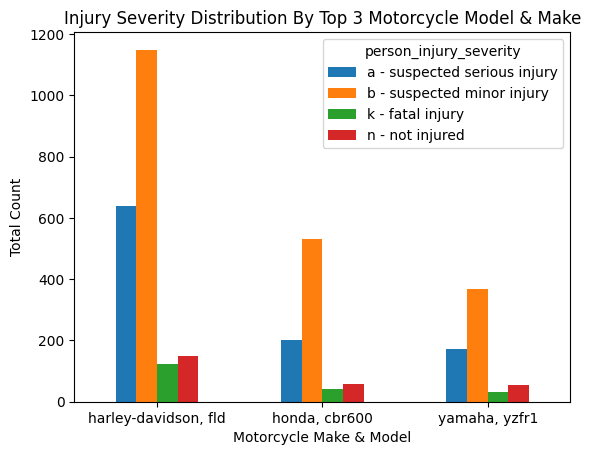

In [31]:
# Top 3 make model and injury distribution
master['make_and_model'] = master.vehicle_make + ', ' + master.vehicle_model
top3list = master.make_and_model.value_counts().head(3).index.to_list()
top3makemodel = master[master.make_and_model.isin(top3list)]
pd.crosstab(top3makemodel.make_and_model, top3makemodel.person_injury_severity).plot(kind='bar')
plt.title('Injury Severity Distribution By Top 3 Motorcycle Model & Make')
plt.xlabel('Motorcycle Make & Model')
plt.xticks(rotation=0)
plt.ylabel('Total Count')
plt.title()

TypeError: title() missing 1 required positional argument: 'label'

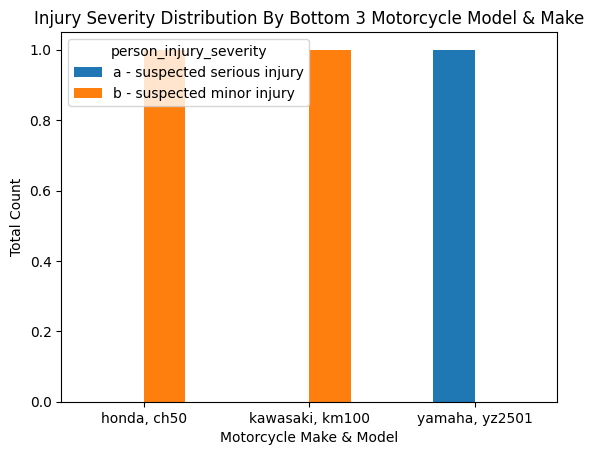

In [32]:
# Bottom 3 make model and injury distribution
master['make_and_model'] = master.vehicle_make + ', ' + master.vehicle_model
bottom3list = master.make_and_model.value_counts().tail(3).index.to_list()
bottom3makemodel = master[master.make_and_model.isin(bottom3list)]
pd.crosstab(bottom3makemodel.make_and_model, bottom3makemodel.person_injury_severity).plot(kind='bar')
plt.title('Injury Severity Distribution By Bottom 3 Motorcycle Model & Make')
plt.xlabel('Motorcycle Make & Model')
plt.xticks(rotation=0)
plt.ylabel('Total Count')
plt.title()

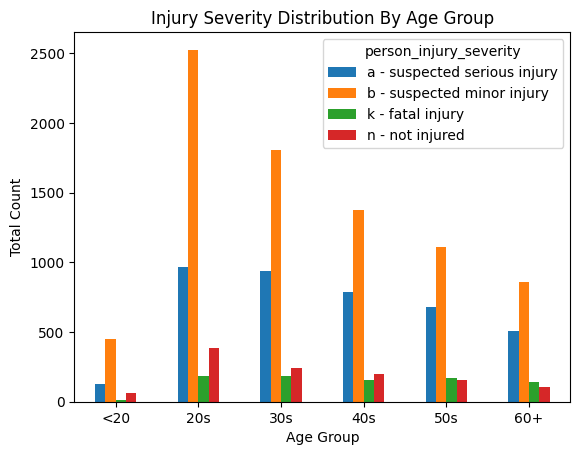

In [70]:
bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = ['<20', '20s', '30s', '40s', '50s', '60+']
master['age_range'] = pd.cut(master['person_age'], bins=bins, labels=labels, right=False)
pd.crosstab(master.age_range, master.person_injury_severity).plot(kind='bar')
plt.title('Injury Severity Distribution By Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.ylabel('Total Count')
plt.show()

In [42]:
master.person_ethnicity.value_counts()

person_ethnicity
w - white                          9111
h - hispanic                       2944
b - black                          1634
a - asian                           223
98 - other                          125
99 - unknown                         53
i - amer. indian/alaskan native      44
Name: count, dtype: int64

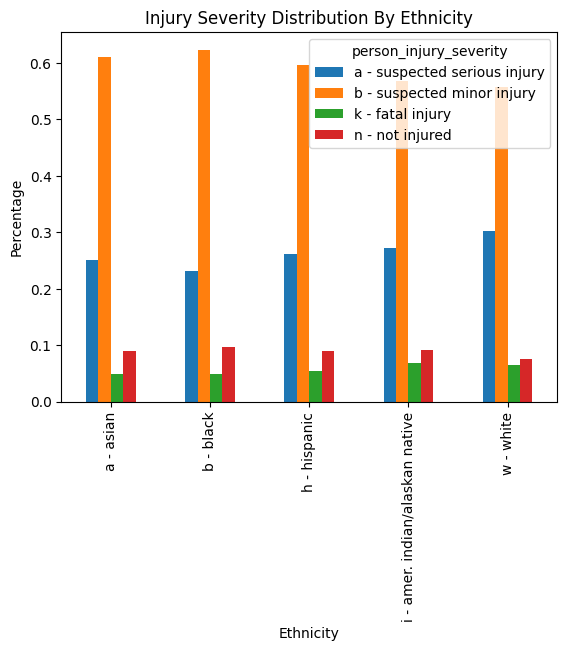

In [66]:
ethnicitystuff = master[~master.person_ethnicity.str.startswith(('98', '99'))]
ethniccross = pd.crosstab(ethnicitystuff.person_ethnicity, ethnicitystuff.person_injury_severity, normalize='index').plot(kind='bar')
plt.title('Injury Severity Distribution By Ethnicity')
plt.xlabel('Ethnicity')
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.show()

<div style='background-color:orange'>
<a id='misc'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Miscellaneous
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    <li><a href='#miscage'>Age</a>
    <li><a href='#miscethnicity'>Ethnicity</a>
    <li><a href='#miscmotorcycleendorsement'>Motorcycle Endorsement</a>
    <li><a href='#miscvehiclebodystyle'>Vehicle Body Style</a>
    <li><a href='#miscvehiclecolor'>Vehicle Color</a>
    <li><a href='#miscvehiclemake'>Vehicle Make</a>
    <li><a href='#miscvehiclemodel'>Vehicle Model</a>
    <li><a href='#miscvehiclemodelyear'>Vehicle Model Year</a>
    <li><a href='#miscvehiclemakecountry'>Vehicle Make Country</a>
    <li><a href='#miscmakeandmodel'>Make And Model</a>
    </li>
</div>

<a id='miscage'></a>
<h3><b><i>
    Age
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The age group of the motorcyclist does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The age group of the motorcyclist does make a significant difference in the injury severity of single motorcycle crashes in Texas.

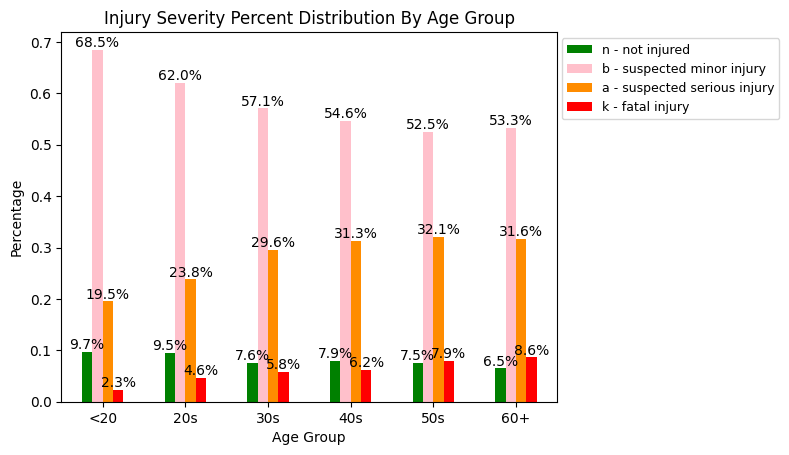

In [137]:
cross_tab = pd.crosstab(master.age_range, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', 'pink', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=00)
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [77]:
for val in master.person_injury_severity.unique():
    for vals in master.age_range.unique():
        observed = pd.crosstab(master.age_range == vals, master.person_injury_severity == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mAge Range:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mAge Range:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== ACCEPT NULL HYPOTHESIS ==========
Age Range: 30s
Injury: a - suspected serious injury
Statistic: 2.8538500982288446
P-Value: 0.09115539957140699

========== REJECT NULL HYPOTHESIS ==========
Age Range: 20s
Injury: a - suspected serious injury
Statistic: 57.84744523341511
P-Value: 2.8325462313819446e-14

========== REJECT NULL HYPOTHESIS ==========
Age Range: <20
Injury: a - suspected serious injury
Statistic: 25.93100349437531
P-Value: 3.538403160628896e-07

========== REJECT NULL HYPOTHESIS ==========
Age Range: 40s
Injury: a - suspected serious injury
Statistic: 12.760526759835368
P-Value: 0.00035401118658650975

========== REJECT NULL HYPOTHESIS ==========
Age Range: 50s
Injury: a - suspected serious injury
Statistic: 16.586543247306974
P-Value: 4.647964753706242e-05

========== REJECT NULL HYPOTHESIS ==========
Age Range: 60+
Injury: a - suspected serious injury
Statistic: 9.435067235454
P-Value: 0.0021287528490641083

========== ACCEPT NULL HYPOTHESIS ==========
Age Ran

<b><i>
    REJECT NULL HYPOTHESIS - FOR MOST!
</i></b>

The age group of the motorcyclist does make a significant difference in the injury severity of single motorcycle crashes in Texas.

(10 - DEFECTIVE OR NO VEHICLE BRAKES rejects only serious and minor injuries, almost rejects fatal)

---

<a id='miscethnicity'></a>
<h3><b><i>
    Ethnicity
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The ethnicity of the motorcyclist does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The ethnicity of the motorcyclist does make a significant difference in the injury severity of single motorcycle crashes in Texas.

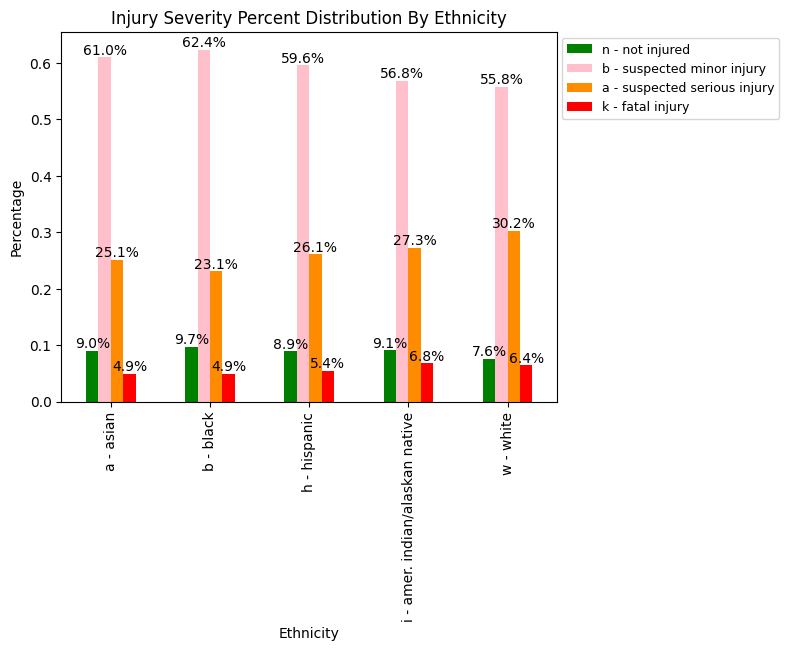

In [138]:
cross_tab = pd.crosstab(master.person_ethnicity[~master.person_ethnicity.str.startswith(('98', '99'))], master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', 'pink', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Ethnicity')
plt.xlabel('Ethnicity')
plt.xticks(rotation=90)
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [222]:
for vals in master.person_ethnicity[~master.person_ethnicity.str.startswith(('98', '99'))].unique():
    for val in master.person_injury_severity.unique():
        observed = pd.crosstab(master.person_ethnicity == vals, master.person_injury_severity == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mEthnicity:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mEthnicity:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== REJECT NULL HYPOTHESIS ==========
Ethnicity: w - white
Injury: a - suspected serious injury
Statistic: 45.07559195823555
P-Value: 1.895735509181383e-11

========== REJECT NULL HYPOTHESIS ==========
Ethnicity: w - white
Injury: b - suspected minor injury
Statistic: 29.197646971745357
P-Value: 6.535853070441412e-08

========== REJECT NULL HYPOTHESIS ==========
Ethnicity: w - white
Injury: n - not injured
Statistic: 12.921227847188085
P-Value: 0.0003248766846379219

========== REJECT NULL HYPOTHESIS ==========
Ethnicity: w - white
Injury: k - fatal injury
Statistic: 7.044279970098997
P-Value: 0.007951878471883627

========== REJECT NULL HYPOTHESIS ==========
Ethnicity: h - hispanic
Injury: a - suspected serious injury
Statistic: 9.179114009959658
P-Value: 0.0024479249478603473

========== REJECT NULL HYPOTHESIS ==========
Ethnicity: h - hispanic
Injury: b - suspected minor injury
Statistic: 6.559457776968898
P-Value: 0.01043281509769194

========== ACCEPT NULL HYPOTHESIS ======

<b><i>
    REJECT NULL HYPOTHESIS - FOR MOST!
</i></b>

The ethnicity of the motorcyclist does make a significant difference in the injury severity of single motorcycle crashes in Texas.

- White rejects all injuries
- Hispanic rejects minor & serious
- Black rejects all except fatal

---

<a id='miscmotorcycleendorsement'></a>
<h3><b><i>
    Motorcycle Endorsement
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> Whether or not the motorcyclist has a motorcycle endorsement does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> Whether or not the motorcyclist has a motorcycle endorsement does make a significant difference in the injury severity of single motorcycle crashes in Texas.

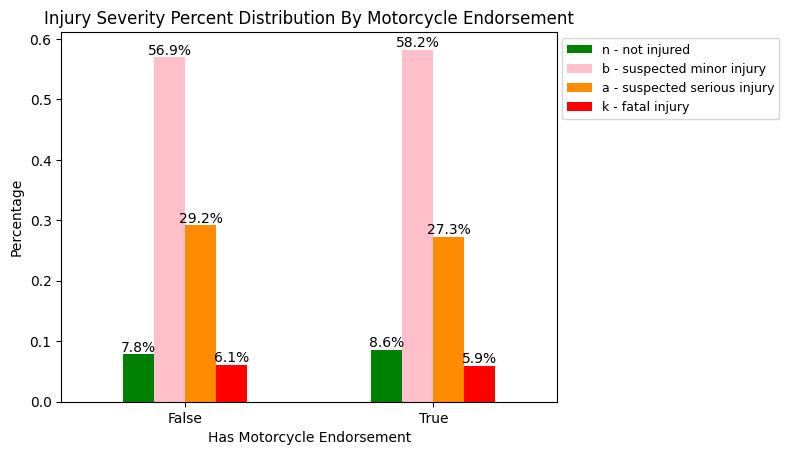

In [131]:
cross_tab = pd.crosstab(master.has_motocycle_endorsment, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', 'pink', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Motorcycle Endorsement')
plt.xlabel('Has Motorcycle Endorsement')
plt.xticks(rotation=0, ticks=range(2), labels=['False', 'True'])
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [223]:
for vals in master.has_motocycle_endorsment.unique():
    for val in master.person_injury_severity.unique():
        observed = pd.crosstab(master.has_motocycle_endorsment == vals, master.person_injury_severity == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mMotorcycle Endorsement:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mMotorcycle Endorsement:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== REJECT NULL HYPOTHESIS ==========
Motorcycle Endorsement: 0
Injury: a - suspected serious injury
Statistic: 6.152072983199137
P-Value: 0.013125816131124037

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Endorsement: 0
Injury: b - suspected minor injury
Statistic: 2.292228607836242
P-Value: 0.13002310826795574

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Endorsement: 0
Injury: n - not injured
Statistic: 2.9319201148103025
P-Value: 0.08684414919099596

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Endorsement: 0
Injury: k - fatal injury
Statistic: 0.17635853552360126
P-Value: 0.6745215167265091

========== REJECT NULL HYPOTHESIS ==========
Motorcycle Endorsement: 1
Injury: a - suspected serious injury
Statistic: 6.152072983199137
P-Value: 0.013125816131124037

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Endorsement: 1
Injury: b - suspected minor injury
Statistic: 2.292228607836242
P-Value: 0.13002310826795574

========== ACCEPT NULL 

<b><i>
    REJECT NULL HYPOTHESIS - FOR ONLY SERIOUS INJURIES!
</i></b>

Whether or not the motorcyclist has a motorcycle endorsement does make a significant difference in the injury severity of single motorcycle crashes in Texas.

- Both has and doesn't have rejects the serious injury

---

<a id='miscvehiclebodystyle'></a>
<h3><b><i>
    Vehicle Body Style
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The body style of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The body style of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

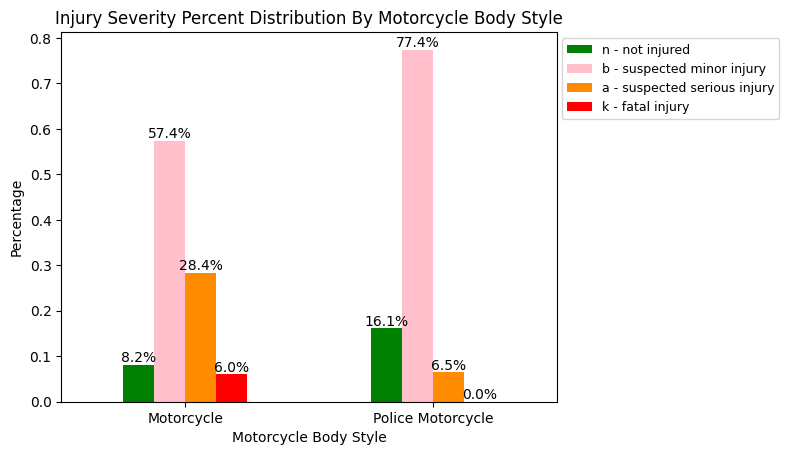

In [140]:
cross_tab = pd.crosstab(master.vehicle_body_style, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', 'pink', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Motorcycle Body Style')
plt.xlabel('Motorcycle Body Style')
plt.xticks(rotation=0, ticks=range(2), labels=['Motorcycle', 'Police Motorcycle'])
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [224]:
for vals in master.vehicle_body_style.unique():
    for val in master.person_injury_severity.unique():
        observed = pd.crosstab(master.vehicle_body_style == vals, master.person_injury_severity == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mMotorcycle Body Style:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mMotorcycle Body Style:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== REJECT NULL HYPOTHESIS ==========
Motorcycle Body Style: mc - motorcycle
Injury: a - suspected serious injury
Statistic: 6.290452535473161
P-Value: 0.012139005412233995

========== REJECT NULL HYPOTHESIS ==========
Motorcycle Body Style: mc - motorcycle
Injury: b - suspected minor injury
Statistic: 4.266935930362466
P-Value: 0.038860944779434255

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Body Style: mc - motorcycle
Injury: n - not injured
Statistic: 1.6664633689886195
P-Value: 0.1967329074072452

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Body Style: mc - motorcycle
Injury: k - fatal injury
Statistic: 1.0601168667213066
P-Value: 0.3031885318819726

========== REJECT NULL HYPOTHESIS ==========
Motorcycle Body Style: pm - police motorcycle
Injury: a - suspected serious injury
Statistic: 6.29045253547316
P-Value: 0.012139005412234

========== REJECT NULL HYPOTHESIS ==========
Motorcycle Body Style: pm - police motorcycle
Injury: b - suspected minor in

<b><i>
    REJECT NULL HYPOTHESIS - FOR ONLY SERIOUS and MINOR INJURIES!
</i></b>

The body style of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

- Both motorcycle body styles rejects minor and serious injuries

---

<a id='miscvehiclecolor'></a>
<h3><b><i>
    Vehicle Color
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The color of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The color of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

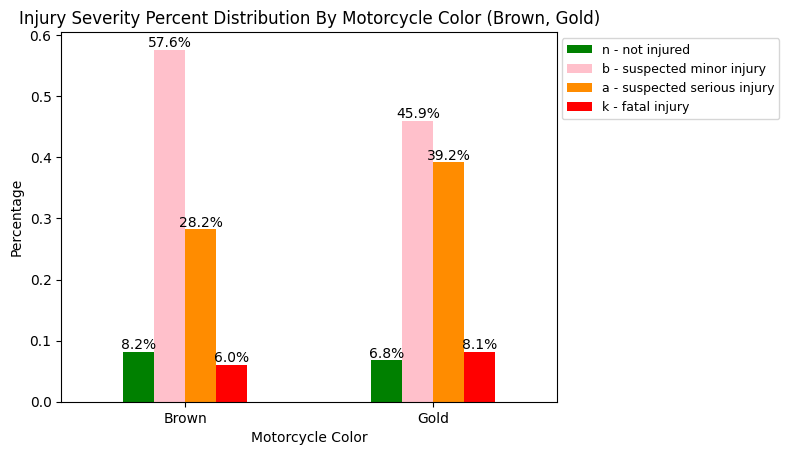

In [147]:
cross_tab = pd.crosstab(master.vehicle_color.str.startswith(('bro', 'gld')), master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', 'pink', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Motorcycle Color (Brown, Gold)')
plt.xlabel('Motorcycle Color')
plt.xticks(rotation=0, ticks=range(2), labels=['Brown', 'Gold'])
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [225]:
for vals in master.vehicle_color.unique():
    for val in master.person_injury_severity.unique():
        observed = pd.crosstab(master.vehicle_color == vals, master.person_injury_severity == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mMotorcycle Color:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mMotorcycle Color:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: blu - blue
Injury: a - suspected serious injury
Statistic: 0.3831807595043506
P-Value: 0.5359058444649055

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: blu - blue
Injury: b - suspected minor injury
Statistic: 1.322140521540962
P-Value: 0.2502082550463645

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: blu - blue
Injury: n - not injured
Statistic: 0.288639138728697
P-Value: 0.5910939247405596

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: blu - blue
Injury: k - fatal injury
Statistic: 0.23948834133285252
P-Value: 0.6245759060418836

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: gry - gray
Injury: a - suspected serious injury
Statistic: 0.5966580549747622
P-Value: 0.4398559778874995

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: gry - gray
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ======

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: bro - brown
Injury: n - not injured
Statistic: 0.017201026555900577
P-Value: 0.8956545251407368

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: bro - brown
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: grn - green
Injury: a - suspected serious injury
Statistic: 0.5410838968305896
P-Value: 0.4619838713158031

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: grn - green
Injury: b - suspected minor injury
Statistic: 0.43307744985227814
P-Value: 0.5104827412770429

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: grn - green
Injury: n - not injured
Statistic: 2.9214223869288345
P-Value: 0.08741078084570124

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: grn - green
Injury: k - fatal injury
Statistic: 3.7854094593179224
P-Value: 0.05170125927020385

========== ACCEPT NULL HYPOTHESIS ==========
Motorc

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: cpr - copper
Injury: b - suspected minor injury
Statistic: 0.11467517932003127
P-Value: 0.7348830260715965

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: cpr - copper
Injury: n - not injured
Statistic: 0.02227847545438499
P-Value: 0.8813486677146558

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: cpr - copper
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: brz - bronze
Injury: a - suspected serious injury
Statistic: 1.3670876050155254
P-Value: 0.24231290436386393

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: brz - bronze
Injury: b - suspected minor injury
Statistic: 0.025295199210203748
P-Value: 0.8736336995752

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: brz - bronze
Injury: n - not injured
Statistic: 0.13415956429502918
P-Value: 0.7141576532872409

========== ACCEPT NULL HYPOTHESIS ===

<b><i>
    REJECT NULL HYPOTHESIS - FOR MULTICOLORED AND GOLD!
</i></b>

The color of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

- Multicolored only rejects fatal injuries
- Gold only rejects minor injuries

---

<a id='miscvehiclemake'></a>
<h3><b><i>
    Vehicle Make
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The make of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The make of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

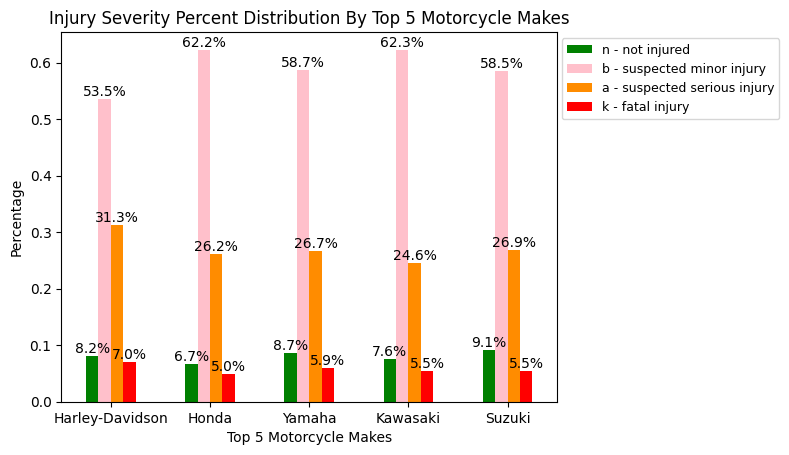

In [174]:
cross_tab = pd.crosstab(master[master.vehicle_make.isin(master.vehicle_make.value_counts().head().index)].vehicle_make, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', 'pink', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Top 5 Motorcycle Makes')
plt.xlabel('Top 5 Motorcycle Makes')
plt.xticks(rotation=0, ticks=range(5), labels=['Harley-Davidson', 'Honda', 'Yamaha', 'Kawasaki', 'Suzuki'])
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [226]:
for vals in master.vehicle_make.unique():
    for val in master.person_injury_severity.unique():
        observed = pd.crosstab(master.vehicle_make == vals, master.person_injury_severity == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mVehicle Make:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mVehicle Make:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== REJECT NULL HYPOTHESIS ==========
Vehicle Make: harley-davidson
Injury: a - suspected serious injury
Statistic: 40.52803722329368
P-Value: 1.9381487857256926e-10

========== REJECT NULL HYPOTHESIS ==========
Vehicle Make: harley-davidson
Injury: b - suspected minor injury
Statistic: 61.036076729214756
P-Value: 5.603843712261595e-15

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: harley-davidson
Injury: n - not injured
Statistic: 0.00011470998511155741
P-Value: 0.9914546005131627

========== REJECT NULL HYPOTHESIS ==========
Vehicle Make: harley-davidson
Injury: k - fatal injury
Statistic: 17.596529036371784
P-Value: 2.7308632554452533e-05

========== REJECT NULL HYPOTHESIS ==========
Vehicle Make: suzuki
Injury: a - suspected serious injury
Statistic: 10.87000574399875
P-Value: 0.000977342268601327

========== REJECT NULL HYPOTHESIS ==========
Vehicle Make: suzuki
Injury: b - suspected minor injury
Statistic: 14.542254664831209
P-Value: 0.0001370508976327354

===

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: american iron horse
Injury: k - fatal injury
Statistic: 0.0008890755533834687
P-Value: 0.9762127056735769

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: all other makes
Injury: a - suspected serious injury
Statistic: 0.01099157679488212
P-Value: 0.9165021973392203

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: all other makes
Injury: b - suspected minor injury
Statistic: 1.6357441466996878
P-Value: 0.20091038964839072

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: all other makes
Injury: n - not injured
Statistic: 0.07279587210189602
P-Value: 0.7873086590513763

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: all other makes
Injury: k - fatal injury
Statistic: 2.8966511495130027
P-Value: 0.08876378622354578

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: triumph motorcycle
Injury: a - suspected serious injury
Statistic: 0.016268870363688133
P-Value: 0.898505511970948

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: vespa
Injury: b - suspected minor injury
Statistic: 0.663888479971017
P-Value: 0.4151905108527427

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: vespa
Injury: n - not injured
Statistic: 0.7061110876539476
P-Value: 0.4007378674456744

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: vespa
Injury: k - fatal injury
Statistic: 1.2999749903952345
P-Value: 0.2542177919459614

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: diamond reo
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: diamond reo
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: diamond reo
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: diamond reo
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL H

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: royal enfield motors
Injury: b - suspected minor injury
Statistic: 0.011609380113398947
P-Value: 0.9141965180322873

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: royal enfield motors
Injury: n - not injured
Statistic: 0.1929178304086446
P-Value: 0.6604991472965831

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: royal enfield motors
Injury: k - fatal injury
Statistic: 0.04128159483122452
P-Value: 0.8389953399701686

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: bobko
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: bobko
Injury: b - suspected minor injury
Statistic: 0.02292854466302586
P-Value: 0.879643037713877

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: bobko
Injury: n - not injured
Statistic: 2.331719808393885
P-Value: 0.12676175977412707

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make:

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: sym
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: sym
Injury: k - fatal injury
Statistic: 0.0031502202315073936
P-Value: 0.9552407761526769

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: polar
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: polar
Injury: b - suspected minor injury
Statistic: 2.0456867642514043
P-Value: 0.1526380881706463

========== REJECT NULL HYPOTHESIS ==========
Vehicle Make: polar
Injury: n - not injured
Statistic: 6.996149469683131
P-Value: 0.008168523681783321

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: polar
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Make: bashan
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========

<b><i>
    REJECT NULL HYPOTHESIS - FOR SOME!
</i></b>

The make of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

- MAKE // REJECT INJURY TYPE
    - Harley-Davidson // minor, serious, fatal
    - Suzuki // minor, serious
    - Honda // all
    - BMW // not injured
    - Genuine Scooter Co. // Minor
    - Triumph Motorcycle // Fatal
    - Polaris // Not, minor
    - Husqvarna // Not
    - Polar // Not

---

<a id='miscvehiclemodel'></a>
<h3><b><i>
    Vehicle Model
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The model of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The model of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

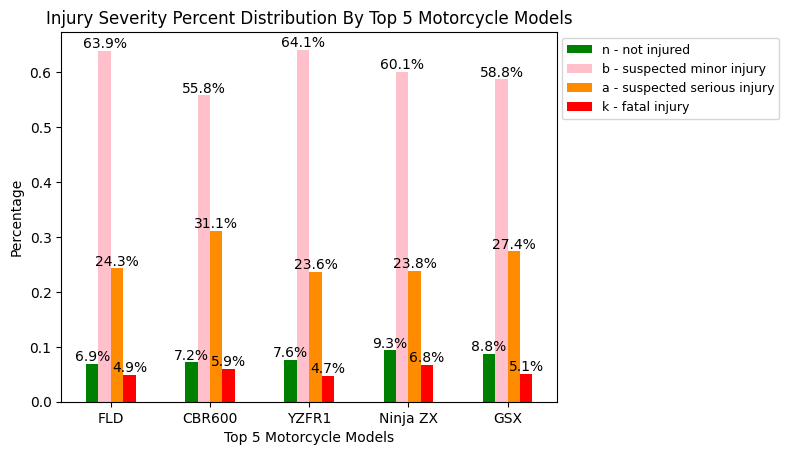

In [177]:
cross_tab = pd.crosstab(master[master.vehicle_model.isin(master.vehicle_model.value_counts().head().index)].vehicle_model, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', 'pink', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Top 5 Motorcycle Models')
plt.xlabel('Top 5 Motorcycle Models')
plt.xticks(rotation=0, ticks=range(5), labels=['FLD', 'CBR600', 'YZFR1', 'Ninja ZX', 'GSX'])
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [227]:
for vals in master.vehicle_model.unique():
    for val in master.person_injury_severity.unique():
        observed = pd.crosstab(master.vehicle_model == vals, master.person_injury_severity == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mVehicle Model:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mVehicle Model:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== REJECT NULL HYPOTHESIS ==========
Vehicle Model: fld
Injury: a - suspected serious injury
Statistic: 8.752130598854917
P-Value: 0.003092405522223137

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fld
Injury: b - suspected minor injury
Statistic: 2.708982421507103
P-Value: 0.09978462348532034

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fld
Injury: n - not injured
Statistic: 2.9571428610922923
P-Value: 0.08549889833861246

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fld
Injury: k - fatal injury
Statistic: 0.010780725658185879
P-Value: 0.9173040416680659

========== REJECT NULL HYPOTHESIS ==========
Vehicle Model: gsx-r600
Injury: a - suspected serious injury
Statistic: 4.548109655093472
P-Value: 0.032955110761201285

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gsx-r600
Injury: b - suspected minor injury
Statistic: 0.016161892135391587
P-Value: 0.8988379581583897

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vt700
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vt700
Injury: k - fatal injury
Statistic: 0.4823302771314459
P-Value: 0.4873686885712486

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zg1000
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zg1000
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zg1000
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zg1000
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xr100
Injury: a - suspected serious injury
Statistic: 0.05506509161830643
P-Value: 0.8144730066905882

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xr1

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gsx-r1000
Injury: k - fatal injury
Statistic: 1.2596293837258954
P-Value: 0.2617212548460118

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xvs650
Injury: a - suspected serious injury
Statistic: 1.8159458345734358
P-Value: 0.1777966139801606

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xvs650
Injury: b - suspected minor injury
Statistic: 0.14549973069790917
P-Value: 0.702873617244551

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xvs650
Injury: n - not injured
Statistic: 0.0426323853935494
P-Value: 0.8364190215050079

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xvs650
Injury: k - fatal injury
Statistic: 0.5096212065784007
P-Value: 0.4753028788399212

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cbr1000
Injury: a - suspected serious injury
Statistic: 0.01624938675126604
P-Value: 0.8985659764492318

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Mod

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxdl
Injury: n - not injured
Statistic: 0.29619134738466396
P-Value: 0.5862800148655775

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxdl
Injury: k - fatal injury
Statistic: 0.8833827883141361
P-Value: 0.3472768319664029

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhtcutg
Injury: a - suspected serious injury
Statistic: 0.0003748272250107523
P-Value: 0.984553556680883

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhtcutg
Injury: b - suspected minor injury
Statistic: 0.12462015029859666
P-Value: 0.7240766005153735

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhtcutg
Injury: n - not injured
Statistic: 0.030903366585640614
P-Value: 0.8604561496749974

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhtcutg
Injury: k - fatal injury
Statistic: 0.3235730563843537
P-Value: 0.5694682397897641

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: ex65

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: blast
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fz6
Injury: a - suspected serious injury
Statistic: 3.1787815326105213
P-Value: 0.07460034022713713

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fz6
Injury: b - suspected minor injury
Statistic: 1.159349339504895
P-Value: 0.2816005225615268

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fz6
Injury: n - not injured
Statistic: 0.5348611755524539
P-Value: 0.4645702597675032

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fz6
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cross country
Injury: a - suspected serious injury
Statistic: 0.6465595047071067
P-Value: 0.4213454387340243

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cross country
Injury: b - suspected minor injury
Statistic: 0.40665

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fltru
Injury: a - suspected serious injury
Statistic: 0.8772231040521465
P-Value: 0.34896337842727776

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fltru
Injury: b - suspected minor injury
Statistic: 0.6382981354538715
P-Value: 0.42432773964070747

========== REJECT NULL HYPOTHESIS ==========
Vehicle Model: fltru
Injury: n - not injured
Statistic: 9.598379402571327
P-Value: 0.001947491722302026

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fltru
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: lightning
Injury: a - suspected serious injury
Statistic: 3.619056659716888
P-Value: 0.057121253576613615

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: lightning
Injury: b - suspected minor injury
Statistic: 1.84031350053028
P-Value: 0.1749142075167806

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: lightning
Injury:

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: crf125
Injury: a - suspected serious injury
Statistic: 0.8286288730535418
P-Value: 0.36266930450072

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: crf125
Injury: b - suspected minor injury
Statistic: 0.32052030819486127
P-Value: 0.571295126465947

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: crf125
Injury: n - not injured
Statistic: 0.02227847545438499
P-Value: 0.8813486677146558

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: crf125
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxs
Injury: a - suspected serious injury
Statistic: 1.1697793958603167
P-Value: 0.27944657335109513

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxs
Injury: b - suspected minor injury
Statistic: 0.00035606585610929384
P-Value: 0.984945045256342

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxs
Injury: n - not inju

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: scout
Injury: a - suspected serious injury
Statistic: 0.5902200157132392
P-Value: 0.4423340526186733

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: scout
Injury: b - suspected minor injury
Statistic: 1.7329933465562615
P-Value: 0.18802907055144993

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: scout
Injury: n - not injured
Statistic: 0.5526201348616324
P-Value: 0.45724908042732415

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: scout
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: crf150
Injury: a - suspected serious injury
Statistic: 0.16519033204239372
P-Value: 0.6844221734079179

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: crf150
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: crf150
Injury: n - not injured
Statistic: 0.0
P-Valu

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cm250
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: klx650
Injury: a - suspected serious injury
Statistic: 0.16519033204239372
P-Value: 0.6844221734079179

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: klx650
Injury: b - suspected minor injury
Statistic: 0.6539090943434956
P-Value: 0.4187185337452288

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: klx650
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: klx650
Injury: k - fatal injury
Statistic: 0.29976955297159075
P-Value: 0.5840269264198896

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zr1200
Injury: a - suspected serious injury
Statistic: 0.8286288730535418
P-Value: 0.36266930450072

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zr1200
Injury: b - suspected minor injury
Statistic: 2.1636277

========== REJECT NULL HYPOTHESIS ==========
Vehicle Model: fxd
Injury: a - suspected serious injury
Statistic: 3.855153799484109
P-Value: 0.049593379774294184

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxd
Injury: b - suspected minor injury
Statistic: 0.3964550335769408
P-Value: 0.5289257274239962

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxd
Injury: n - not injured
Statistic: 1.0054170409619538
P-Value: 0.3160032831857215

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxd
Injury: k - fatal injury
Statistic: 0.9381830292678739
P-Value: 0.3327455584953244

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: i-280
Injury: a - suspected serious injury
Statistic: 0.3626941416320742
P-Value: 0.5470137721705949

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: i-280
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: i-280
Injury: n - not injured
Stat

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: dl1000
Injury: n - not injured
Statistic: 0.8660457420151539
P-Value: 0.35205234551461506

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: dl1000
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vt750
Injury: a - suspected serious injury
Statistic: 0.4622367342722998
P-Value: 0.4965804836202815

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vt750
Injury: b - suspected minor injury
Statistic: 0.21711923699403934
P-Value: 0.6412437365239982

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vt750
Injury: n - not injured
Statistic: 0.34244220744510223
P-Value: 0.5584229142836677

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vt750
Injury: k - fatal injury
Statistic: 0.990449446892281
P-Value: 0.31963255055640144

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxlr
Injury: a - suspected serious injury
Sta

========== REJECT NULL HYPOTHESIS ==========
Vehicle Model: sportsman
Injury: a - suspected serious injury
Statistic: 6.8993000577673635
P-Value: 0.008622950310259144

========== REJECT NULL HYPOTHESIS ==========
Vehicle Model: sportsman
Injury: b - suspected minor injury
Statistic: 6.601671896660558
P-Value: 0.010188305568783881

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sportsman
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sportsman
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sh150
Injury: a - suspected serious injury
Statistic: 1.477404110155086
P-Value: 0.2241811154256693

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sh150
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sh150
Injury: n - not injured
Statistic: 1.6953575909254017
P-Value: 

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flst
Injury: n - not injured
Statistic: 1.104425370485161
P-Value: 0.2932969676431776

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flst
Injury: k - fatal injury
Statistic: 0.011131483409638406
P-Value: 0.9159744319353835

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gsx-r750
Injury: a - suspected serious injury
Statistic: 0.12694902208401077
P-Value: 0.721616611182873

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gsx-r750
Injury: b - suspected minor injury
Statistic: 0.17782179717821597
P-Value: 0.6732518748467292

========== REJECT NULL HYPOTHESIS ==========
Vehicle Model: gsx-r750
Injury: n - not injured
Statistic: 4.37094844294527
P-Value: 0.03655663928524098

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gsx-r750
Injury: k - fatal injury
Statistic: 0.12466613421332724
P-Value: 0.7240277784778695

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: ctx1300


========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fsc600
Injury: n - not injured
Statistic: 0.039396000478503175
P-Value: 0.8426662004230027

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fsc600
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vs1400
Injury: a - suspected serious injury
Statistic: 0.4931520439096823
P-Value: 0.482524608996316

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vs1400
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vs1400
Injury: n - not injured
Statistic: 0.08214432015126912
P-Value: 0.7744122550997852

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vs1400
Injury: k - fatal injury
Statistic: 0.0031502202315073936
P-Value: 0.9552407761526769

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flstfb
Injury: a - suspected serious injury
Statistic: 3.004934485514

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhtkl
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zx900
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zx900
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zx900
Injury: n - not injured
Statistic: 0.009880739309364124
P-Value: 0.9208191679221919

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zx900
Injury: k - fatal injury
Statistic: 0.01622752217579651
P-Value: 0.8986338737733187

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhtkse
Injury: a - suspected serious injury
Statistic: 1.5498383502711504
P-Value: 0.21315930633609736

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhtkse
Injury: b - suspected minor injury
Statistic: 1.274099690672244
P-Value: 0.2589989

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vf1100
Injury: b - suspected minor injury
Statistic: 0.04116645658655574
P-Value: 0.8392169568801746

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vf1100
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vf1100
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gl1500
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gl1500
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gl1500
Injury: n - not injured
Statistic: 1.2712685560857848
P-Value: 0.2595288344974403

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gl1500
Injury: k - fatal injury
Statistic: 2.8422327290493055
P-Value: 0.09181655205927898

========== ACCEPT NULL HYPOTHES

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: r1150
Injury: b - suspected minor injury
Statistic: 0.11467517932003127
P-Value: 0.7348830260715965

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: r1150
Injury: n - not injured
Statistic: 0.02227847545438499
P-Value: 0.8813486677146558

========== REJECT NULL HYPOTHESIS ==========
Vehicle Model: r1150
Injury: k - fatal injury
Statistic: 5.108536085182644
P-Value: 0.02380840110054328

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 1198
Injury: a - suspected serious injury
Statistic: 0.033029700765159674
P-Value: 0.8557861834114548

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 1198
Injury: b - suspected minor injury
Statistic: 0.0017654903880881196
P-Value: 0.9664845569520649

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 1198
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 1198
Injury: k - fatal injury
Statis

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xv920
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhpei
Injury: a - suspected serious injury
Statistic: 0.011006783951556187
P-Value: 0.9164446679837245

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhpei
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhpei
Injury: n - not injured
Statistic: 0.7548741415466742
P-Value: 0.38493742275651

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhpei
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vs800
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vs800
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle 

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: tu250
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhrci
Injury: a - suspected serious injury
Statistic: 0.0034216296888996745
P-Value: 0.9533545856838579

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhrci
Injury: b - suspected minor injury
Statistic: 0.4361978967572329
P-Value: 0.5089633005804908

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhrci
Injury: n - not injured
Statistic: 0.001946046699963152
P-Value: 0.9648135178679277

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhrci
Injury: k - fatal injury
Statistic: 1.7285535368054563
P-Value: 0.18859572971892866

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhcs
Injury: a - suspected serious injury
Statistic: 0.4958517331310771
P-Value: 0.48132852766670575

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhcs
Injury: b - suspecte

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: scr950
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: scr950
Injury: n - not injured
Statistic: 0.28855934012605966
P-Value: 0.5911452214177267

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: scr950
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: ch80
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: ch80
Injury: b - suspected minor injury
Statistic: 0.06879536941247141
P-Value: 0.7930988625718748

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: ch80
Injury: n - not injured
Statistic: 0.28855934012605966
P-Value: 0.5911452214177267

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: ch80
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ====

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: m900
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: klx250
Injury: a - suspected serious injury
Statistic: 1.155089637514662
P-Value: 0.2824862391975773

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: klx250
Injury: b - suspected minor injury
Statistic: 0.11467517932003127
P-Value: 0.7348830260715965

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: klx250
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: klx250
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fz07
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fz07
Injury: b - suspected minor injury
Statistic: 0.986726289606437
P-Value: 0.3205438163431034

========== ACCEPT NULL HYPO

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: r series
Injury: b - suspected minor injury
Statistic: 0.0017654903880881196
P-Value: 0.9664845569520649

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: r series
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: r series
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: g650
Injury: a - suspected serious injury
Statistic: 0.23095254352854538
P-Value: 0.6308184296011117

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: g650
Injury: b - suspected minor injury
Statistic: 0.02292854466302586
P-Value: 0.879643037713877

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: g650
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: g650
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHES

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gsf650
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gsf650
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gsf650
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gsf650
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fzr600
Injury: a - suspected serious injury
Statistic: 0.252059756362143
P-Value: 0.6156284594956674

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fzr600
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fzr600
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fzr600
Injury: k - fat

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gl12
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxstdi
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxstdi
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxstdi
Injury: n - not injured
Statistic: 0.02227847545438499
P-Value: 0.8813486677146558

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxstdi
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gl1200
Injury: a - suspected serious injury
Statistic: 0.004011860361452832
P-Value: 0.9494963629540412

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gl1200
Injury: b - suspected minor injury
Statistic: 0.05412832118169982
P-Value: 0.8160293616035537

========== ACCEPT 

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: ch250
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rm60
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rm60
Injury: b - suspected minor injury
Statistic: 0.02292854466302586
P-Value: 0.879643037713877

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rm60
Injury: n - not injured
Statistic: 2.331719808393885
P-Value: 0.12676175977412707

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rm60
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zb50
Injury: a - suspected serious injury
Statistic: 0.23095254352854538
P-Value: 0.6308184296011117

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zb50
Injury: b - suspected minor injury
Statistic: 0.02292854466302586
P-Value: 0.879643037713877

==

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sr250
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sr250
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gd250r
Injury: a - suspected serious injury
Statistic: 0.49448536732477083
P-Value: 0.48193327809645725

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gd250r
Injury: b - suspected minor injury
Statistic: 1.4748568155348591
P-Value: 0.22458095826708946

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gd250r
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gd250r
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: g series
Injury: a - suspected serious injury
Statistic: 0.49448536732477083
P-Value: 0.48193327809645725

========== ACCEPT NULL HYP

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxdbi
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxrt
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxrt
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxrt
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxrt
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vf750
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vf750
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vf750
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

==

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: ar50
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: ar50
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: ar50
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: ar50
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxrs
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxrs
Injury: b - suspected minor injury
Statistic: 0.32052030819486127
P-Value: 0.571295126465947

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxrs
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxrs
Injury: k - fatal injury
Stati

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: s
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: s
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: s
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: s
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xj650
Injury: a - suspected serious injury
Statistic: 0.20142907153167944
P-Value: 0.6535698049942724

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xj650
Injury: b - suspected minor injury
Statistic: 0.06879536941247141
P-Value: 0.7930988625718748

========== REJECT NULL HYPOTHESIS ==========
Vehicle Model: xj650
Injury: n - not injured
Statistic: 6.996149469683131
P-Value: 0.008168523681783321

========== ACCEPT NULL HYPOTHESIS =======

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yf60
Injury: b - suspected minor injury
Statistic: 0.8637241395456512
P-Value: 0.35269861188189944

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yf60
Injury: n - not injured
Statistic: 0.7548741415466742
P-Value: 0.38493742275651

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yf60
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rocket iii
Injury: a - suspected serious injury
Statistic: 0.033305861259711966
P-Value: 0.8551911901067037

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rocket iii
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rocket iii
Injury: n - not injured
Statistic: 0.039396000478503175
P-Value: 0.8426662004230027

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rocket iii
Injury: k - fatal injury
Statistic: 0.0
P-Va

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxdg
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sr
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sr
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sr
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sr
Injury: k - fatal injury
Statistic: 0.05796083566731707
P-Value: 0.8097484443314329

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: le650
Injury: a - suspected serious injury
Statistic: 0.011006783951556187
P-Value: 0.9164446679837245

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: le650
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: le650
I

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxdi
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxdi
Injury: b - suspected minor injury
Statistic: 0.6539090943434956
P-Value: 0.4187185337452288

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxdi
Injury: n - not injured
Statistic: 0.09988669780426972
P-Value: 0.7519656434817841

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxdi
Injury: k - fatal injury
Statistic: 0.29976955297159075
P-Value: 0.5840269264198896

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xv750
Injury: a - suspected serious injury
Statistic: 0.3626941416320742
P-Value: 0.5470137721705949

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xv750
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xv750
Injury: n - not injured
Statistic: 1.193624328907382


========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cyclone
Injury: b - suspected minor injury
Statistic: 0.8637241395456512
P-Value: 0.35269861188189944

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cyclone
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cyclone
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: k9
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: k9
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: k9
Injury: n - not injured
Statistic: 0.00020876181692565239
P-Value: 0.9884720924474562

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: k9
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== REJECT NULL HYPOTHESIS ==========
Vehicle Model: flstsc
Inju

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zx550
Injury: a - suspected serious injury
Statistic: 0.6929556926662513
P-Value: 0.4051608559360834

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zx550
Injury: b - suspected minor injury
Statistic: 0.06879536941247141
P-Value: 0.7930988625718748

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zx550
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zx550
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xj750
Injury: a - suspected serious injury
Statistic: 0.011006783951556187
P-Value: 0.9164446679837245

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xj750
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xj750
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HY

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhpe
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhpe
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhpe
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sprint
Injury: a - suspected serious injury
Statistic: 0.5246606947666204
P-Value: 0.46886030525648315

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sprint
Injury: b - suspected minor injury
Statistic: 0.6145948697415401
P-Value: 0.4330629871880548

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sprint
Injury: n - not injured
Statistic: 0.00020876181692565239
P-Value: 0.9884720924474562

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sprint
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHES

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xs1100
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fltruse
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fltruse
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fltruse
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fltruse
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zr800
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zr800
Injury: b - suspected minor injury
Statistic: 0.02292854466302586
P-Value: 0.879643037713877

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zr800
Injury: n - 

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fltcui
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fltcui
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cr60
Injury: a - suspected serious injury
Statistic: 0.011006783951556187
P-Value: 0.9164446679837245

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cr60
Injury: b - suspected minor injury
Statistic: 0.25106821883339786
P-Value: 0.6163239141404402

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cr60
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cr60
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: k1600
Injury: a - suspected serious injury
Statistic: 0.9355509022585047
P-Value: 0.33342466841343155

========== ACCEPT NULL HYPOTHESIS ==

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: mrt300
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: mrt300
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: mrt300
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flstfbs
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flstfbs
Injury: b - suspected minor injury
Statistic: 0.02292854466302586
P-Value: 0.879643037713877

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flstfbs
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flstfbs
Injury: k - fatal injury
Statistic: 3.433062747566624
P-Value: 0.06390348896584103

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model:

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: agility
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: agility
Injury: n - not injured
Statistic: 0.28855934012605966
P-Value: 0.5911452214177267

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: agility
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zn750
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zn750
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zn750
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zn750
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxlrs
Injury: a - suspected serio

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: klx140
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: klx140
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vrscd
Injury: a - suspected serious injury
Statistic: 0.033305861259711966
P-Value: 0.8551911901067037

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vrscd
Injury: b - suspected minor injury
Statistic: 0.0049994604447750265
P-Value: 0.9436310587989115

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vrscd
Injury: n - not injured
Statistic: 0.039396000478503175
P-Value: 0.8426662004230027

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vrscd
Injury: k - fatal injury
Statistic: 0.0008890755533834687
P-Value: 0.9762127056735769

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 1090
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 500
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 500
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 500
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: deluxe touring
Injury: a - suspected serious injury
Statistic: 0.20142907153167944
P-Value: 0.6535698049942724

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: deluxe touring
Injury: b - suspected minor injury
Statistic: 0.8202882119188636
P-Value: 0.36509591292553145

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: deluxe touring
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: deluxe touring
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ====

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhrsei
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhrsei
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhrsei
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhrsei
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhtcul
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhtcul
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhtcul
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhtcul
Injury: k - fatal injury
Statistic: 

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 900
Injury: a - suspected serious injury
Statistic: 0.011006783951556187
P-Value: 0.9164446679837245

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 900
Injury: b - suspected minor injury
Statistic: 0.25106821883339786
P-Value: 0.6163239141404402

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 900
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 900
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: tiger
Injury: a - suspected serious injury
Statistic: 0.21835325860609936
P-Value: 0.6402975273706482

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: tiger
Injury: b - suspected minor injury
Statistic: 0.6382981354538715
P-Value: 0.42432773964070747

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: tiger
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

=

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhtcu/i
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: hp4
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: hp4
Injury: b - suspected minor injury
Statistic: 0.02292854466302586
P-Value: 0.879643037713877

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: hp4
Injury: n - not injured
Statistic: 2.331719808393885
P-Value: 0.12676175977412707

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: hp4
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cn250
Injury: a - suspected serious injury
Statistic: 0.23095254352854538
P-Value: 0.6308184296011117

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cn250
Injury: b - suspected minor injury
Statistic: 0.02292854466302586
P-Value: 0.879643037713877

=

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fj1200
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxdfse
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxdfse
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxdfse
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxdfse
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: jr80
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: jr80
Injury: b - suspected minor injury
Statistic: 0.02292854466302586
P-Value: 0.879643037713877

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: jr80
Injury: n - not inj

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: lx
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: lx
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: pro hauler
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: pro hauler
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: pro hauler
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: pro hauler
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhtc/i
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhtc/i
Injury: b - suspected minor injury
Statistic

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: pw80
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zx1002
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zx1002
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zx1002
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zx1002
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: f1200
Injury: a - suspected serious injury
Statistic: 0.011006783951556187
P-Value: 0.9164446679837245

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: f1200
Injury: b - suspected minor injury
Statistic: 0.25106821883339786
P-Value: 0.6163239141404402

========== ACCEPT NULL HYPOTHESIS ==========
Vehicl

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yfm300
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yfm300
Injury: b - suspected minor injury
Statistic: 0.02292854466302586
P-Value: 0.879643037713877

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yfm300
Injury: n - not injured
Statistic: 2.331719808393885
P-Value: 0.12676175977412707

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yfm300
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: speed triple
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: speed triple
Injury: b - suspected minor injury
Statistic: 0.06879536941247141
P-Value: 0.7930988625718748

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: speed triple
Injury: n - not injured
Statistic: 0.28855934012605966


========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: na50
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: atc185
Injury: a - suspected serious injury
Statistic: 0.23095254352854538
P-Value: 0.6308184296011117

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: atc185
Injury: b - suspected minor injury
Statistic: 0.02292854466302586
P-Value: 0.879643037713877

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: atc185
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: atc185
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxstbi
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxstbi
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicl

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fl250
Injury: b - suspected minor injury
Statistic: 0.32052030819486127
P-Value: 0.571295126465947

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fl250
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fl250
Injury: k - fatal injury
Statistic: 0.14192051358696472
P-Value: 0.706379177662729

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cr125
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cr125
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cr125
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cr125
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 996
Injury

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: bashan scooter
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhtcse
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhtcse
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhtcse
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: flhtcse
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxef
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxef
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxef
Injury: n - not injured
Statistic: 0.

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xr650
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xr650
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xj550
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xj550
Injury: b - suspected minor injury
Statistic: 0.8637241395456512
P-Value: 0.35269861188189944

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xj550
Injury: n - not injured
Statistic: 0.7548741415466742
P-Value: 0.38493742275651

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xj550
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xc50
Injury: a - suspected serious injury
Statistic: 0.23095254352854538
P-Value: 0.6308184296011117

========== ACCEPT NULL HYPOTHESIS =====

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: ttr125
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xb9sx
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xb9sx
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xb9sx
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xb9sx
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: crf50
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: crf50
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: crf50
Injury: n - not injured
Statistic: 0.0
P-Value: 1.

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yxz1000
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fiddle ii
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fiddle ii
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fiddle ii
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fiddle ii
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xplorer
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xplorer
Injury: b - suspected minor injury
Statistic: 0.02292854466302586
P-Value: 0.879643037713877

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: xplor

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gs850
Injury: b - suspected minor injury
Statistic: 0.25106821883339786
P-Value: 0.6163239141404402

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gs850
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gs850
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: chf50
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: chf50
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: chf50
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: chf50
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: k100
Injury: a - suspected serious inju

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: mrt260e
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: mrt260e
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: mrt260e
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: mrt260e
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxdx
Injury: a - suspected serious injury
Statistic: 0.49448536732477083
P-Value: 0.48193327809645725

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxdx
Injury: b - suspected minor injury
Statistic: 1.4748568155348591
P-Value: 0.22458095826708946

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fxdx
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehic

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: c650
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: c650
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: c650
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: c650
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 1m
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 1m
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 1m
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 1m
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACC

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rmx450z
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: lt-a450
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: lt-a450
Injury: b - suspected minor injury
Statistic: 0.02292854466302586
P-Value: 0.879643037713877

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: lt-a450
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: lt-a450
Injury: k - fatal injury
Statistic: 3.433062747566624
P-Value: 0.06390348896584103

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 50
Injury: a - suspected serious injury
Statistic: 0.23095254352854538
P-Value: 0.6308184296011117

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 50
Injury: b - suspected minor injury
Statistic: 0.02292854466302586
P-Value: 0.879643037

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yfz50
Injury: a - suspected serious injury
Statistic: 0.23095254352854538
P-Value: 0.6308184296011117

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yfz50
Injury: b - suspected minor injury
Statistic: 0.02292854466302586
P-Value: 0.879643037713877

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yfz50
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yfz50
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sxs500
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sxs500
Injury: b - suspected minor injury
Statistic: 0.02292854466302586
P-Value: 0.879643037713877

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sxs500
Injury: n - not injured
Statistic: 2.331719808393885
P-Value: 0.1267617597741

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: tt-r110e
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: tt-r110e
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: tt-r110e
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: tt-r110e
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yfm450
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yfm450
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yfm450
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yfm450
Injury: k - fatal injury
Statistic: 

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zr550
Injury: b - suspected minor injury
Statistic: 0.02292854466302586
P-Value: 0.879643037713877

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zr550
Injury: n - not injured
Statistic: 2.331719808393885
P-Value: 0.12676175977412707

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zr550
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: jackpot
Injury: a - suspected serious injury
Statistic: 0.011006783951556187
P-Value: 0.9164446679837245

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: jackpot
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: jackpot
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: jackpot
Injury: k - fatal injury
Statistic: 1.2804176938316694
P-Value: 0.25782138664400817


========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 888
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 888
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 888
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 888
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sportcity 250
Injury: a - suspected serious injury
Statistic: 0.23095254352854538
P-Value: 0.6308184296011117

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sportcity 250
Injury: b - suspected minor injury
Statistic: 0.02292854466302586
P-Value: 0.879643037713877

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sportcity 250
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS =======

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 999
Injury: b - suspected minor injury
Statistic: 0.25106821883339786
P-Value: 0.6163239141404402

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 999
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 999
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yfa1
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yfa1
Injury: b - suspected minor injury
Statistic: 0.8637241395456512
P-Value: 0.35269861188189944

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yfa1
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: yfa1
Injury: k - fatal injury
Statistic: 1.2804176938316694
P-Value: 0.25782138664400817

========== ACCEPT NULL HYPOTHESIS ==========
Ve

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: continental gt
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: continental gt
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cbx550
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cbx550
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cbx550
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cbx550
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: k series
Injury: a - suspected serious injury
Statistic: 0.23095254352854538
P-Value: 0.6308184296011117

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: k series
Inj

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 200
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: 200
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sportclassic
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sportclassic
Injury: b - suspected minor injury
Statistic: 0.02292854466302586
P-Value: 0.879643037713877

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sportclassic
Injury: n - not injured
Statistic: 2.331719808393885
P-Value: 0.12676175977412707

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sportclassic
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: zr1100
Injury: a - suspected serious injury
Statistic: 0.011006783951556187
P-Value: 0.9164446679837245

========== 

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gts1000
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: gts1000
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: classic 350
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: classic 350
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: classic 350
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: classic 350
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: bullet
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: bullet
Injury: b - suspected minor inju

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: trx650
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: trx650
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: trx650
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cb450
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cb450
Injury: b - suspected minor injury
Statistic: 0.02292854466302586
P-Value: 0.879643037713877

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cb450
Injury: n - not injured
Statistic: 2.331719808393885
P-Value: 0.12676175977412707

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: cb450
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rg500
I

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fj1100
Injury: b - suspected minor injury
Statistic: 0.02292854466302586
P-Value: 0.879643037713877

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fj1100
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: fj1100
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: kl250
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: kl250
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: kl250
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: kl250
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: atc250
Injury: a - suspected serious 

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rm500
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rm500
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rc1000vs
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rc1000vs
Injury: b - suspected minor injury
Statistic: 0.02292854466302586
P-Value: 0.879643037713877

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rc1000vs
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rc1000vs
Injury: k - fatal injury
Statistic: 3.433062747566624
P-Value: 0.06390348896584103

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: sport
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Mod

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vrscse
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vrscse
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: vrscse
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: movie
Injury: a - suspected serious injury
Statistic: 0.23095254352854538
P-Value: 0.6308184296011117

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: movie
Injury: b - suspected minor injury
Statistic: 0.02292854466302586
P-Value: 0.879643037713877

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: movie
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: movie
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: rm100


========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: r65
Injury: a - suspected serious injury
Statistic: 0.23095254352854538
P-Value: 0.6308184296011117

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: r65
Injury: b - suspected minor injury
Statistic: 0.02292854466302586
P-Value: 0.879643037713877

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: r65
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: r65
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: k-pipe
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: k-pipe
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: k-pipe
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Vehicle Model: k-

<b><i>
    REJECT NULL HYPOTHESIS - FOR SOME!
</i></b>

The model of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

- MODEL // INJURY TYPE
    - FLD // serious
    - GSX-R600 // serious
    - CBR-600 // minor, serious
    - Ninja ZX // serious
    - X1883 // not, serious
    - GSX // minor, serious
    - F1HR // minor, serious
    - R1100 // not
    - F1HTPI // serious
    - Buddy // minor
    - G11800 // not
    - F1HT // minor
    - F1TRU // not
    - FLDE // minor, serious
    - M109R/VZR1800 // fatal

---

<a id='miscvehiclemodelyear'></a>
<h3><b><i>
    Vehicle Model Year
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The model year of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The model year of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

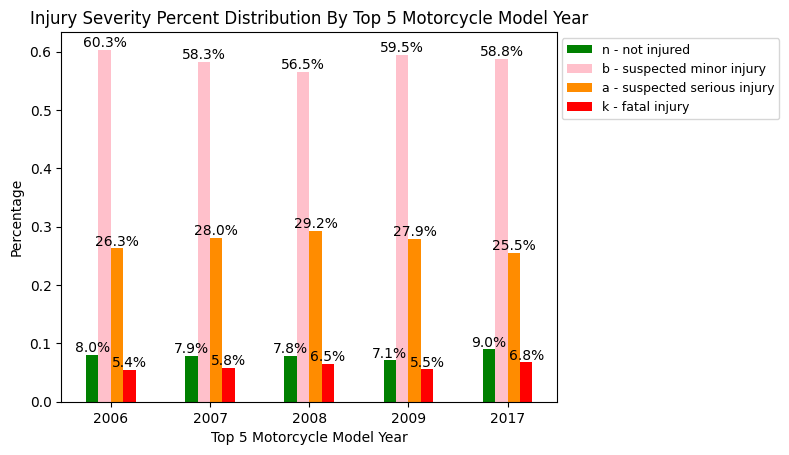

In [199]:
cross_tab = pd.crosstab(master[master.vehicle_model_year.isin(master.vehicle_model_year.value_counts().head().index)].vehicle_model_year, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', 'pink', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Top 5 Motorcycle Model Year')
plt.xlabel('Top 5 Motorcycle Model Year')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [228]:
for vals in master[master.vehicle_model_year > 999].vehicle_model_year.unique():
    for val in master.person_injury_severity.unique():
        observed = pd.crosstab(master.vehicle_model_year == vals, master.person_injury_severity == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mModel Year:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mModel Year:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2007
Injury: a - suspected serious injury
Statistic: 0.04377254896936975
P-Value: 0.8342773572468438

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2007
Injury: b - suspected minor injury
Statistic: 0.30008911271717964
P-Value: 0.5838265605004405

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2007
Injury: n - not injured
Statistic: 0.08883351877620939
P-Value: 0.7656653655802581

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2007
Injury: k - fatal injury
Statistic: 0.07362582053445432
P-Value: 0.7861289422616088

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2004
Injury: a - suspected serious injury
Statistic: 3.193375194174309
P-Value: 0.0739372084547641

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2004
Injury: b - suspected minor injury
Statistic: 3.482751832771907
P-Value: 0.06201153833668245

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2004
Injury: n - not 

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1988
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1988
Injury: k - fatal injury
Statistic: 0.3826992803673684
P-Value: 0.5361621558046265

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2008
Injury: a - suspected serious injury
Statistic: 0.2687711745575725
P-Value: 0.6041572723064974

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2008
Injury: b - suspected minor injury
Statistic: 0.28864182495278623
P-Value: 0.5910921981228124

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2008
Injury: n - not injured
Statistic: 0.08637179276836215
P-Value: 0.7688413607979615

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2008
Injury: k - fatal injury
Statistic: 0.22428498036674843
P-Value: 0.6357941962445004

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2006
Injury: a - suspected serious injury
Statistic: 1.8109739865373626
P-

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1992
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1992
Injury: k - fatal injury
Statistic: 0.48834391831304336
P-Value: 0.4846669760067607

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1996
Injury: a - suspected serious injury
Statistic: 0.19476754523119466
P-Value: 0.6589779023898736

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1996
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1996
Injury: n - not injured
Statistic: 0.0092809666894828
P-Value: 0.9232523113194677

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1996
Injury: k - fatal injury
Statistic: 0.12466613421332724
P-Value: 0.7240277784778695

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1987
Injury: a - suspected serious injury
Statistic: 1.1723390099424267
P-Value: 0.27892115770514714

==

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1974
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1973
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1973
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1973
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1973
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1971
Injury: a - suspected serious injury
Statistic: 0.23095254352854538
P-Value: 0.6308184296011117

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1971
Injury: b - suspected minor injury
Statistic: 0.02292854466302586
P-Value: 0.879643037713877

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1971
Injury: n - not injure

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2023
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1968
Injury: a - suspected serious injury
Statistic: 0.011006783951556187
P-Value: 0.9164446679837245

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1968
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1968
Injury: n - not injured
Statistic: 0.7548741415466742
P-Value: 0.38493742275651

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1968
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1951
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1951
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1951
Injury: n - not injured

<b><i>
    REJECT NULL HYPOTHESIS - FOR MOST!
</i></b>

The model year of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

(10 - DEFECTIVE OR NO VEHICLE BRAKES rejects only serious and minor injuries, almost rejects fatal)

---

<a id='miscvehiclemakecountry'></a>
<h3><b><i>
    Vehicle Make Country
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The make country of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The make country of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

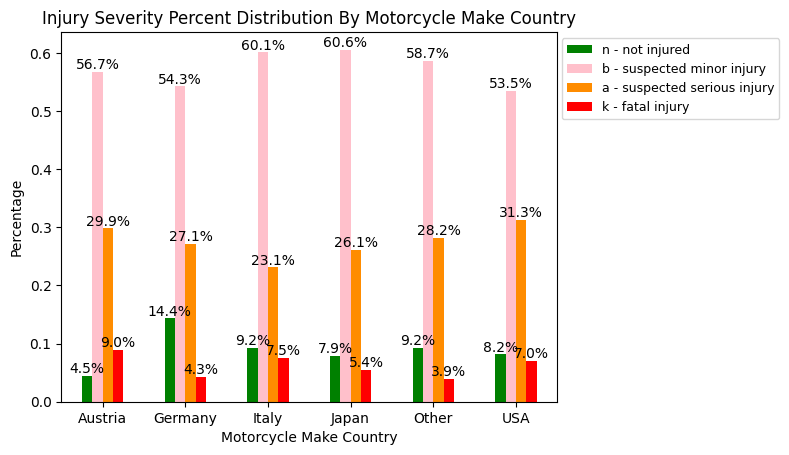

In [208]:
cross_tab = pd.crosstab(master.vehicle_make_country, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', 'pink', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Motorcycle Make Country')
plt.xlabel('Motorcycle Make Country')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [229]:
for vals in master.vehicle_make_country.unique():
    for val in master.person_injury_severity.unique():
        observed = pd.crosstab(master.vehicle_make_country == vals, master.person_injury_severity == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mMake Country:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mMake Country:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== REJECT NULL HYPOTHESIS ==========
Make Country: USA
Injury: a - suspected serious injury
Statistic: 40.52803722329368
P-Value: 1.9381487857256926e-10

========== REJECT NULL HYPOTHESIS ==========
Make Country: USA
Injury: b - suspected minor injury
Statistic: 61.036076729214756
P-Value: 5.603843712261595e-15

========== ACCEPT NULL HYPOTHESIS ==========
Make Country: USA
Injury: n - not injured
Statistic: 0.00011470998511155741
P-Value: 0.9914546005131627

========== REJECT NULL HYPOTHESIS ==========
Make Country: USA
Injury: k - fatal injury
Statistic: 17.596529036371784
P-Value: 2.7308632554452533e-05

========== REJECT NULL HYPOTHESIS ==========
Make Country: Japan
Injury: a - suspected serious injury
Statistic: 33.74404106844334
P-Value: 6.2861303594854374e-09

========== REJECT NULL HYPOTHESIS ==========
Make Country: Japan
Injury: b - suspected minor injury
Statistic: 54.11314345950782
P-Value: 1.8927097411305793e-13

========== ACCEPT NULL HYPOTHESIS ==========
Make C

<b><i>
    REJECT NULL HYPOTHESIS - FOR MOST!
</i></b>

The make country of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

(10 - DEFECTIVE OR NO VEHICLE BRAKES rejects only serious and minor injuries, almost rejects fatal)

---

<a id='miscmakeandmodel'></a>
<h3><b><i>
    Make and Model
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The make and model of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The make and model of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

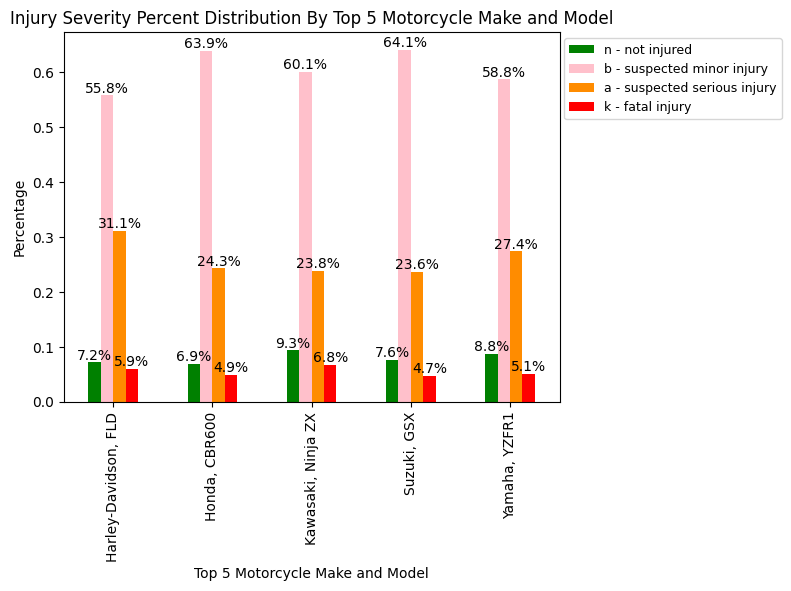

In [219]:
cross_tab = pd.crosstab(master[master.make_and_model.isin(master.make_and_model.value_counts().head().index)].make_and_model, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', 'pink', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Top 5 Motorcycle Make and Model')
plt.xlabel('Top 5 Motorcycle Make and Model')
plt.xticks(rotation=90, ticks=range(5), labels=['Harley-Davidson, FLD', 'Honda, CBR600', 'Kawasaki, Ninja ZX', 'Suzuki, GSX', 'Yamaha, YZFR1'])
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [230]:
for vals in master.make_and_model.unique():
    for val in master.person_injury_severity.unique():
        observed = pd.crosstab(master.age_range == vals, master.person_injury_severity == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mMake and Model:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mMake and Model:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fld
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fld
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fld
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fld
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gsx-r600
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gsx-r600
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gsx-r600
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT 

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cb600
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cb600
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cb600
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cb600
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, ex250
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, ex250
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, ex250
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, vtx1800
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, vtx1800
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, vtx1800
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, r1200
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, r1200
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, r1200
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, r1200
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ducati, monster

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, xlh883
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, xlh883
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, xlh883
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, xlh883
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxdb
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxdb
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxdb
Injury: n - not injured
Statistic: 0.0
P-Val

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, xvs1300
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, xvs1300
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, xvs1300
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yxr660
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yxr660
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yxr660
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yxr660
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Mod

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, zr1000
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, c50
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, c50
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, c50
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, c50
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kl600
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kl600
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and M

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhr/i
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhr/i
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhr/i
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: indian motorcycle co., scout
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: indian motorcycle co., scout
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: indian motorcycle co., scout
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: indian motorcycle co., scout
Injury: k - fatal injury
Statis

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, klx650
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, zr1200
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, zr1200
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, zr1200
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, zr1200
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, st1300
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, st1300
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS =====

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: victory motorcycles, high-ball
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: victory motorcycles, high-ball
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: moto guzzi, v7
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: moto guzzi, v7
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: moto guzzi, v7
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: moto guzzi, v7
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, r100
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHES

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, vl800
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cmx250
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cmx250
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cmx250
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cmx250
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, vn900
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, vn900
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make 

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, st1100
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhtcuse6
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhtcuse6
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhtcuse6
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhtcuse6
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhtc
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhtc
Injury: b - suspected minor injury
Statistic: 0.

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, thunderbird
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, thunderbird
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, thunderbird
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, rm-z250
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, rm-z250
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, rm-z250
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, rm-z250
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

=====

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxdc
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxdc
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxdc
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxdc
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cbr929
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cbr929
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cbr929
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL 

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhxse
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: american iron horse, outlaw
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: american iron horse, outlaw
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: american iron horse, outlaw
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: american iron horse, outlaw
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, sv650
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, sv650
Injury: b - suspected minor injury
Statistic: 0.0
P-

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, 1600
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, 1600
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, 1600
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: polaris, slingshot
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: polaris, slingshot
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: polaris, slingshot
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: polaris, slingshot
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: hyosung, gt650
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: hyosung, gt650
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: hyosung, gt650
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: hyosung, gt650
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, c70
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, c70
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, c70
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model:

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gsx600
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, atc110
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, atc110
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, atc110
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, atc110
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, tu250
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, tu250
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gs400
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gs400
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gs400
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, scr950
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, scr950
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, scr950
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, scr950
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ho

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, klx250
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, klx250
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, klx250
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, klx250
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, fz07
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, fz07
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, fz07
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
M

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, g650
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, g650
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, g650
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, vt600
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, vt600
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, vt600
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, vt600
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: aprilia, sportcity
Inj

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, ca50
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flfbs
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flfbs
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flfbs
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flfbs
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gsf650
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gsf650
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, gl12
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, gl12
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, gl12
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxstdi
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxstdi
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxstdi
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxstdi
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: aprilia, shiver
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: aprilia, shiver
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: aprilia, shiver
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: aprilia, shiver
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, m50
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, m50
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, m50
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ducati, 1098
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ducati, 1098
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: indian motorcycle co., springfield
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: indian motorcycle co., springfield
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: indian motorcycle co., springfield
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: indian motorcycle co., springfield
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, xv250
Injury: a - suspected serious injury
Statistic: 0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, vn800
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, vn800
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, vn800
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: victory motorcycles, v92
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: victory motorcycles, v92
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: victory motorcycles, v92
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: victory motorcycles, v92
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, bn125
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, bn125
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, bn125
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, bn125
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gs1000
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gs1000
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gs1000
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 380
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 380
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yf60
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yf60
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yf60
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yf60
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, rocket iii
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: t

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, le650
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, le650
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, le650
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, le650
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, crf450
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, crf450
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, crf450
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Ma

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, xv750
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, bw350
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, bw350
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, bw350
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, bw350
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxsb
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxsb
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ====

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: big dog, k9
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: big dog, k9
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flstsc
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flstsc
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flstsc
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flstsc
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, cv50
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHE

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cr500
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cr500
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cr500
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cr500
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, street scrambler
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, street scrambler
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, street scrambler
Injury: n - not injured
Statistic: 0.0
P-Va

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: big dog, coyote
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: big dog, coyote
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: big dog, coyote
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: big dog, coyote
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, xsr900
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, xsr900
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, xsr900
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gsf1200
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gsf1200
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, lt-a400
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, lt-a400
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, lt-a400
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, lt-a400
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kef300
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make 

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gs700
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gs700
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gs700
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gs700
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, vn2000
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, vn2000
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, vn2000
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
M

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kdx250
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kdx250
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, crf250
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, crf250
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, crf250
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, crf250
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kz1300
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Mo

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, xv500
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, xv500
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: lancia, unknown
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: lancia, unknown
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: lancia, unknown
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: lancia, unknown
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kx450
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and M

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: husqvarna, svartpilen 401
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: husqvarna, svartpilen 401
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: husqvarna, svartpilen 401
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: royal enfield motors, int 650
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: royal enfield motors, int 650
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: royal enfield motors, int 650
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: royal enfield motors, int 650
Injury: k - fatal inj

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 250
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 250
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 250
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 250
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: indian motorcycle co., roadmaster
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: indian motorcycle co., roadmaster
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: indian motorcycle co., roadmaster
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCE

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cb550
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cb550
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cb550
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cb550
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, vrscr
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, vrscr
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, vrscr
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESI

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhtcu/i
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, hp4
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, hp4
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, hp4
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, hp4
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cn250
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cn250
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: hon

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhxse3
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhxse3
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhxse3
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, vrscaw
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, vrscaw
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, vrscaw
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, vrscaw
Injury: k - fatal injury
Statistic: 0.0
P-Value:

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, lt-a750
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, lt-a750
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, crf230
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, crf230
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, crf230
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, crf230
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ducati, m600
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: d

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, cy50
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, cy50
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, cy50
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, cy50
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, ts100
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, ts100
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, ts100
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, crf70
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, crf70
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, crf70
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, vrscdx
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, vrscdx
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, vrscdx
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, vrscdx
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHE

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cbx250
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, speed
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, speed
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, speed
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, speed
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: buell, xb12scg
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: buell, xb12scg
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

====

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, fj600
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, fj600
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, fj600
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, trx250
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, trx250
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, trx250
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, trx250
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 105
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 105
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 105
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 105
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, xl500
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, xl500
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, xl500
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, xl500
Inju

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, ttr50
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cm400
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cm400
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cm400
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cm400
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, ttr125
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, ttr125
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Mo

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yxz1000
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yxz1000
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yxz1000
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: sym, fiddle ii
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: sym, fiddle ii
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: sym, fiddle ii
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: sym, fiddle ii
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Mod

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gs850
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gs850
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gs850
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gs850
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, chf50
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, chf50
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, chf50
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Mode

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxdx
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, accord
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, accord
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, accord
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, accord
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, trx350
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, trx350
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
M

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, 1m
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, 1m
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, 1m
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, vrscda
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, vrscda
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, vrscda
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, vrscda
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========


========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 50
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 50
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 50
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, el650
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, el650
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, el650
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, el650
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, dr-z50
I

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yfz50
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, sxs500
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, sxs500
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, sxs500
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, sxs500
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, vx800
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, vx800
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and 

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ducati, st4
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ducati, st4
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ducati, st4
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, tt-r230
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, tt-r230
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, tt-r230
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, tt-r230
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harl

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: victory motorcycles, judge
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, en450
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, en450
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, en450
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, en450
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, klx230
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, klx230
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPO

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, grand
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, grand
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, grand
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, grand
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: moto guzzi, griso
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: moto guzzi, griso
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: moto guzzi, griso
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS =========

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, trident
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, trident
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, trident
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: big dog, mastiff
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: big dog, mastiff
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: big dog, mastiff
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: big dog, mastiff
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== AC

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, lw1
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 125
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 125
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 125
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ktm, 125
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, xf50
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, xf50
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, 

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, ar80
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, ar80
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cbf300
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cbf300
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cbf300
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cbf300
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: moto guzzi, california 1100
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, sp600
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, sp600
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: aprilia, dorsoduro
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: aprilia, dorsoduro
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: aprilia, dorsoduro
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: aprilia, dorsoduro
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: sym, fiddle iii
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS =========

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, x90
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, x90
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, x90
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, x90
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: big dog, pitbull
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: big dog, pitbull
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: big dog, pitbull
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and 

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: polaris, ranger
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: polaris, ranger
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: polaris, ranger
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, m series
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, m series
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, m series
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, m series
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: 

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxdse
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhrse3
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhrse3
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhrse3
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhrse3
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, vrscse
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, vrscse
Injury: b - suspected minor injury
Statistic:

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, rm80
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ducati, 749
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ducati, 749
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ducati, 749
Injury: n - not injured
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ducati, 749
Injury: k - fatal injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, vn700
Injury: a - suspected serious injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, vn700
Injury: b - suspected minor injury
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model

<b><i>
    REJECT NULL HYPOTHESIS - FOR MOST!
</i></b>

The make and model of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

(10 - DEFECTIVE OR NO VEHICLE BRAKES rejects only serious and minor injuries, almost rejects fatal)